## Final Data Dive

Group Members:
- Paul Casey
- Brian Matthews
- Jessica Spinnager
- Steven Dew

In [1]:
# Import Libraries 
import re
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import missingno as msno
from sklearn.linear_model import Ridge
from sklearn import datasets, linear_model
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler as sc
from numpy import arange
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
pd.set_option('display.max_columns', None) #allows for up to 200 columns to be displayed when viewing a dataframe
pd.set_option('display.max_rows', None)
plt.style.use('seaborn') # a style that can be used for plots - see style reference above

# trick to widen the screen
from IPython.core.display import display, HTML

#Widens the code landscape 
display(HTML("<style>.container { width:95% !important; }</style>"))

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

C:\Users\Katabatic\AppData\Local\Temp\ipykernel_2056\2269010807.py:36: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn') # a style that can be used for plots - see style reference above
C:\Users\Katabatic\AppData\Local\Temp\ipykernel_2056\2269010807.py:39: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
# Read in the file
df_Ca = pd.read_csv("./College_Admission_data.csv", index_col = 0, header = 0)
df_Ca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1534 entries, Alabama A & M University to Polytechnic University of Puerto Rico-Orlando
Columns: 107 entries, Applicants total to Endowment assets (year end) per FTE enrollment (FASB)
dtypes: float64(97), object(10)
memory usage: 1.3+ MB


In [3]:
df_Ca.head()


Applicants total  Admissions total  \
Name                                                                      
Alabama A & M University                       6142.0            5521.0   
University of Alabama at Birmingham            5689.0            4934.0   
Amridge University                                NaN               NaN   
University of Alabama in Huntsville            2054.0            1656.0   
Alabama State University                      10245.0            5251.0   

                                     Enrolled total  \
Name                                                  
Alabama A & M University                     1104.0   
University of Alabama at Birmingham          1773.0   
Amridge University                              NaN   
University of Alabama in Huntsville           651.0   
Alabama State University                     1479.0   

                                     Percent of freshmen submitting SAT scores  \
Name                                                                             
Alabama A & M University                                                  15.0   
University of Alabama at Birmingham                                        6.0   
Amridge University                                                         NaN   
University of Alabama in Huntsville                                       34.0   
Alabama State University                                                  18.0   

                                     Percent of freshmen submitting ACT scores  \
Name                                                                             
Alabama A & M University                                                  88.0   
University of Alabama at Birmingham                                       93.0   
Amridge University                                                         NaN   
University of Alabama in Huntsville                                       94.0   
Alabama State University                                                  87.0   

                                     SAT Critical Reading 25th percentile score  \
Name                                                                              
Alabama A & M University                                                  370.0   
University of Alabama at Birmingham                                       520.0   
Amridge University                                                          NaN   
University of Alabama in Huntsville                                       510.0   
Alabama State University                                                  380.0   

                                     SAT Critical Reading 75th percentile score  \
Name                                                                              
Alabama A & M University                                                  450.0   
University of Alabama at Birmingham                                       640.0   
Amridge University                                                          NaN   
University of Alabama in Huntsville                                       640.0   
Alabama State University                                                  480.0   

                                     SAT Math 25th percentile score  \
Name                                                                  
Alabama A & M University                                      350.0   
University of Alabama at Birmingham                           520.0   
Amridge University                                              NaN   
University of Alabama in Huntsville                           510.0   
Alabama State University                                      370.0   

                                     SAT Math 75th percentile score  \
Name                                                                  
Alabama A & M University                                      450.0   
University of Alabama at Birmingham                           650.0   
Amridge University           

In [4]:
# msno.bar(df_Ca)

In [5]:
# Get dummy variables for all categorical data
df_Ca = pd.get_dummies(df_Ca)

In [6]:
# Before data imputation, let's see how many rows and columns we have
df_Ca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1534 entries, Alabama A & M University to Polytechnic University of Puerto Rico-Orlando
Columns: 237 entries, Applicants total to Carnegie Classification 2010: Basic_Research Universities (very high research activity)
dtypes: float64(97), uint8(140)
memory usage: 1.4+ MB


## Data Imputation

In [7]:
missing_values = df_Ca.isnull().sum()

# Create a DataFrame to display column names and corresponding missing value counts
missing_info = pd.DataFrame({
    'Column_Name': missing_values.index,
    'Missing_Values': missing_values.values
})

# Display columns with missing values
print("Columns with missing values:")
print(missing_info[missing_info['Missing_Values'] > 0])

Columns with missing values:
                                          Column_Name  Missing_Values
0                                    Applicants total             157
1                                    Admissions total             157
2                                      Enrolled total             157
3           Percent of freshmen submitting SAT scores             277
4           Percent of freshmen submitting ACT scores             275
5          SAT Critical Reading 25th percentile score             365
6          SAT Critical Reading 75th percentile score             365
7                      SAT Math 25th percentile score             352
8                      SAT Math 75th percentile score             352
9                   SAT Writing 25th percentile score             820
10                  SAT Writing 75th percentile score             820
11                ACT Composite 25th percentile score             335
12                ACT Composite 75th percentile score        

In [8]:
# We decided to remove rows with that are missing data for Applicant total, Admissions total, and Enrolled total because these are curtial statistics in our mind that vary wildly. 

columns_to_check = ['Applicants total', 'Admissions total', 'Enrolled total']

# Remove rows with missing values in the specified columns
df_Ca = df_Ca.dropna(subset=columns_to_check)

# Reset the index after dropping rows
df_Ca = df_Ca.reset_index(drop=True)

In [9]:
missing_values = df_Ca.isnull().sum()

# Create a DataFrame to display column names and corresponding missing value counts
missing_info = pd.DataFrame({
    'Column_Name': missing_values.index,
    'Missing_Values': missing_values.values
})

# Display columns with missing values
print("Columns with missing values:")
print(missing_info[missing_info['Missing_Values'] > 0])

Columns with missing values:
                                          Column_Name  Missing_Values
3           Percent of freshmen submitting SAT scores             120
4           Percent of freshmen submitting ACT scores             118
5          SAT Critical Reading 25th percentile score             208
6          SAT Critical Reading 75th percentile score             208
7                      SAT Math 25th percentile score             195
8                      SAT Math 75th percentile score             195
9                   SAT Writing 25th percentile score             663
10                  SAT Writing 75th percentile score             663
11                ACT Composite 25th percentile score             178
12                ACT Composite 75th percentile score             178
15                    Estimated enrollment, part time               3
18      Estimated undergraduate enrollment, part time               5
21           Estimated freshman enrollment, part time        

In [10]:
# Next, we decided to drop the columns that have more than 300 missing values.
# These rows tend to be very specific and cannot be easily imputed with a mean or zero.

threshold = 300

# Drop columns with more than 300 missing values
df_Ca = df_Ca.dropna(thresh=len(df_Ca) - threshold, axis=1)

In [11]:
# Check missing values again
missing_values = df_Ca.isnull().sum()

# Create a DataFrame to display column names and corresponding missing value counts
missing_info = pd.DataFrame({
    'Column_Name': missing_values.index,
    'Missing_Values': missing_values.values
})

# Display columns with missing values
print("Columns with missing values:")
print(missing_info[missing_info['Missing_Values'] > 0])

Columns with missing values:
                                          Column_Name  Missing_Values
3           Percent of freshmen submitting SAT scores             120
4           Percent of freshmen submitting ACT scores             118
5          SAT Critical Reading 25th percentile score             208
6          SAT Critical Reading 75th percentile score             208
7                      SAT Math 25th percentile score             195
8                      SAT Math 75th percentile score             195
9                 ACT Composite 25th percentile score             178
10                ACT Composite 75th percentile score             178
13                    Estimated enrollment, part time               3
16      Estimated undergraduate enrollment, part time               5
19           Estimated freshman enrollment, part time              56
20               Estimated graduate enrollment, total              83
21           Estimated graduate enrollment, full time        

In [12]:
# For the rest of these columns we decided to use the mean value to fill in the na's
# We didn't want to just get rid of the columns and even though some are missing over 200, we felt that it filling in the the mean value should produce accurate results
numeric_columns = df_Ca.select_dtypes(include=['float64']).columns
df_Ca[numeric_columns] = df_Ca[numeric_columns].fillna(df_Ca[numeric_columns].mean())

In [13]:
# We should see that there are no more missing values
missing_values = df_Ca.isnull().sum()

# Display columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


In [14]:
# Show how many rows and columns we have left
df_Ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1377 entries, 0 to 1376
Columns: 225 entries, Applicants total to Carnegie Classification 2010: Basic_Research Universities (very high research activity)
dtypes: float64(85), uint8(140)
memory usage: 1.1 MB


In [15]:
# Since our target variable is Admissions total, we need to drop any columns with "enrollment" or "enrolled" or "admission" since they are too closely related to our target variable.

keywords_to_drop = ['enrollment', 'enrolled', 'admission', 'freshmen']

# Create a regex pattern to match column names containing specified keywords
pattern = '|'.join(keywords_to_drop)
regex_pattern = re.compile(pattern, flags=re.IGNORECASE)

# Use regex pattern to filter columns
df_Ca_filtered = df_Ca[df_Ca.columns[~df_Ca.columns.str.contains(regex_pattern)]].copy()
df_Ca = df_Ca_filtered
# Display the updated DataFrame information
df_Ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1377 entries, 0 to 1376
Columns: 158 entries, Applicants total to Carnegie Classification 2010: Basic_Research Universities (very high research activity)
dtypes: float64(18), uint8(140)
memory usage: 382.0 KB


## More EDA

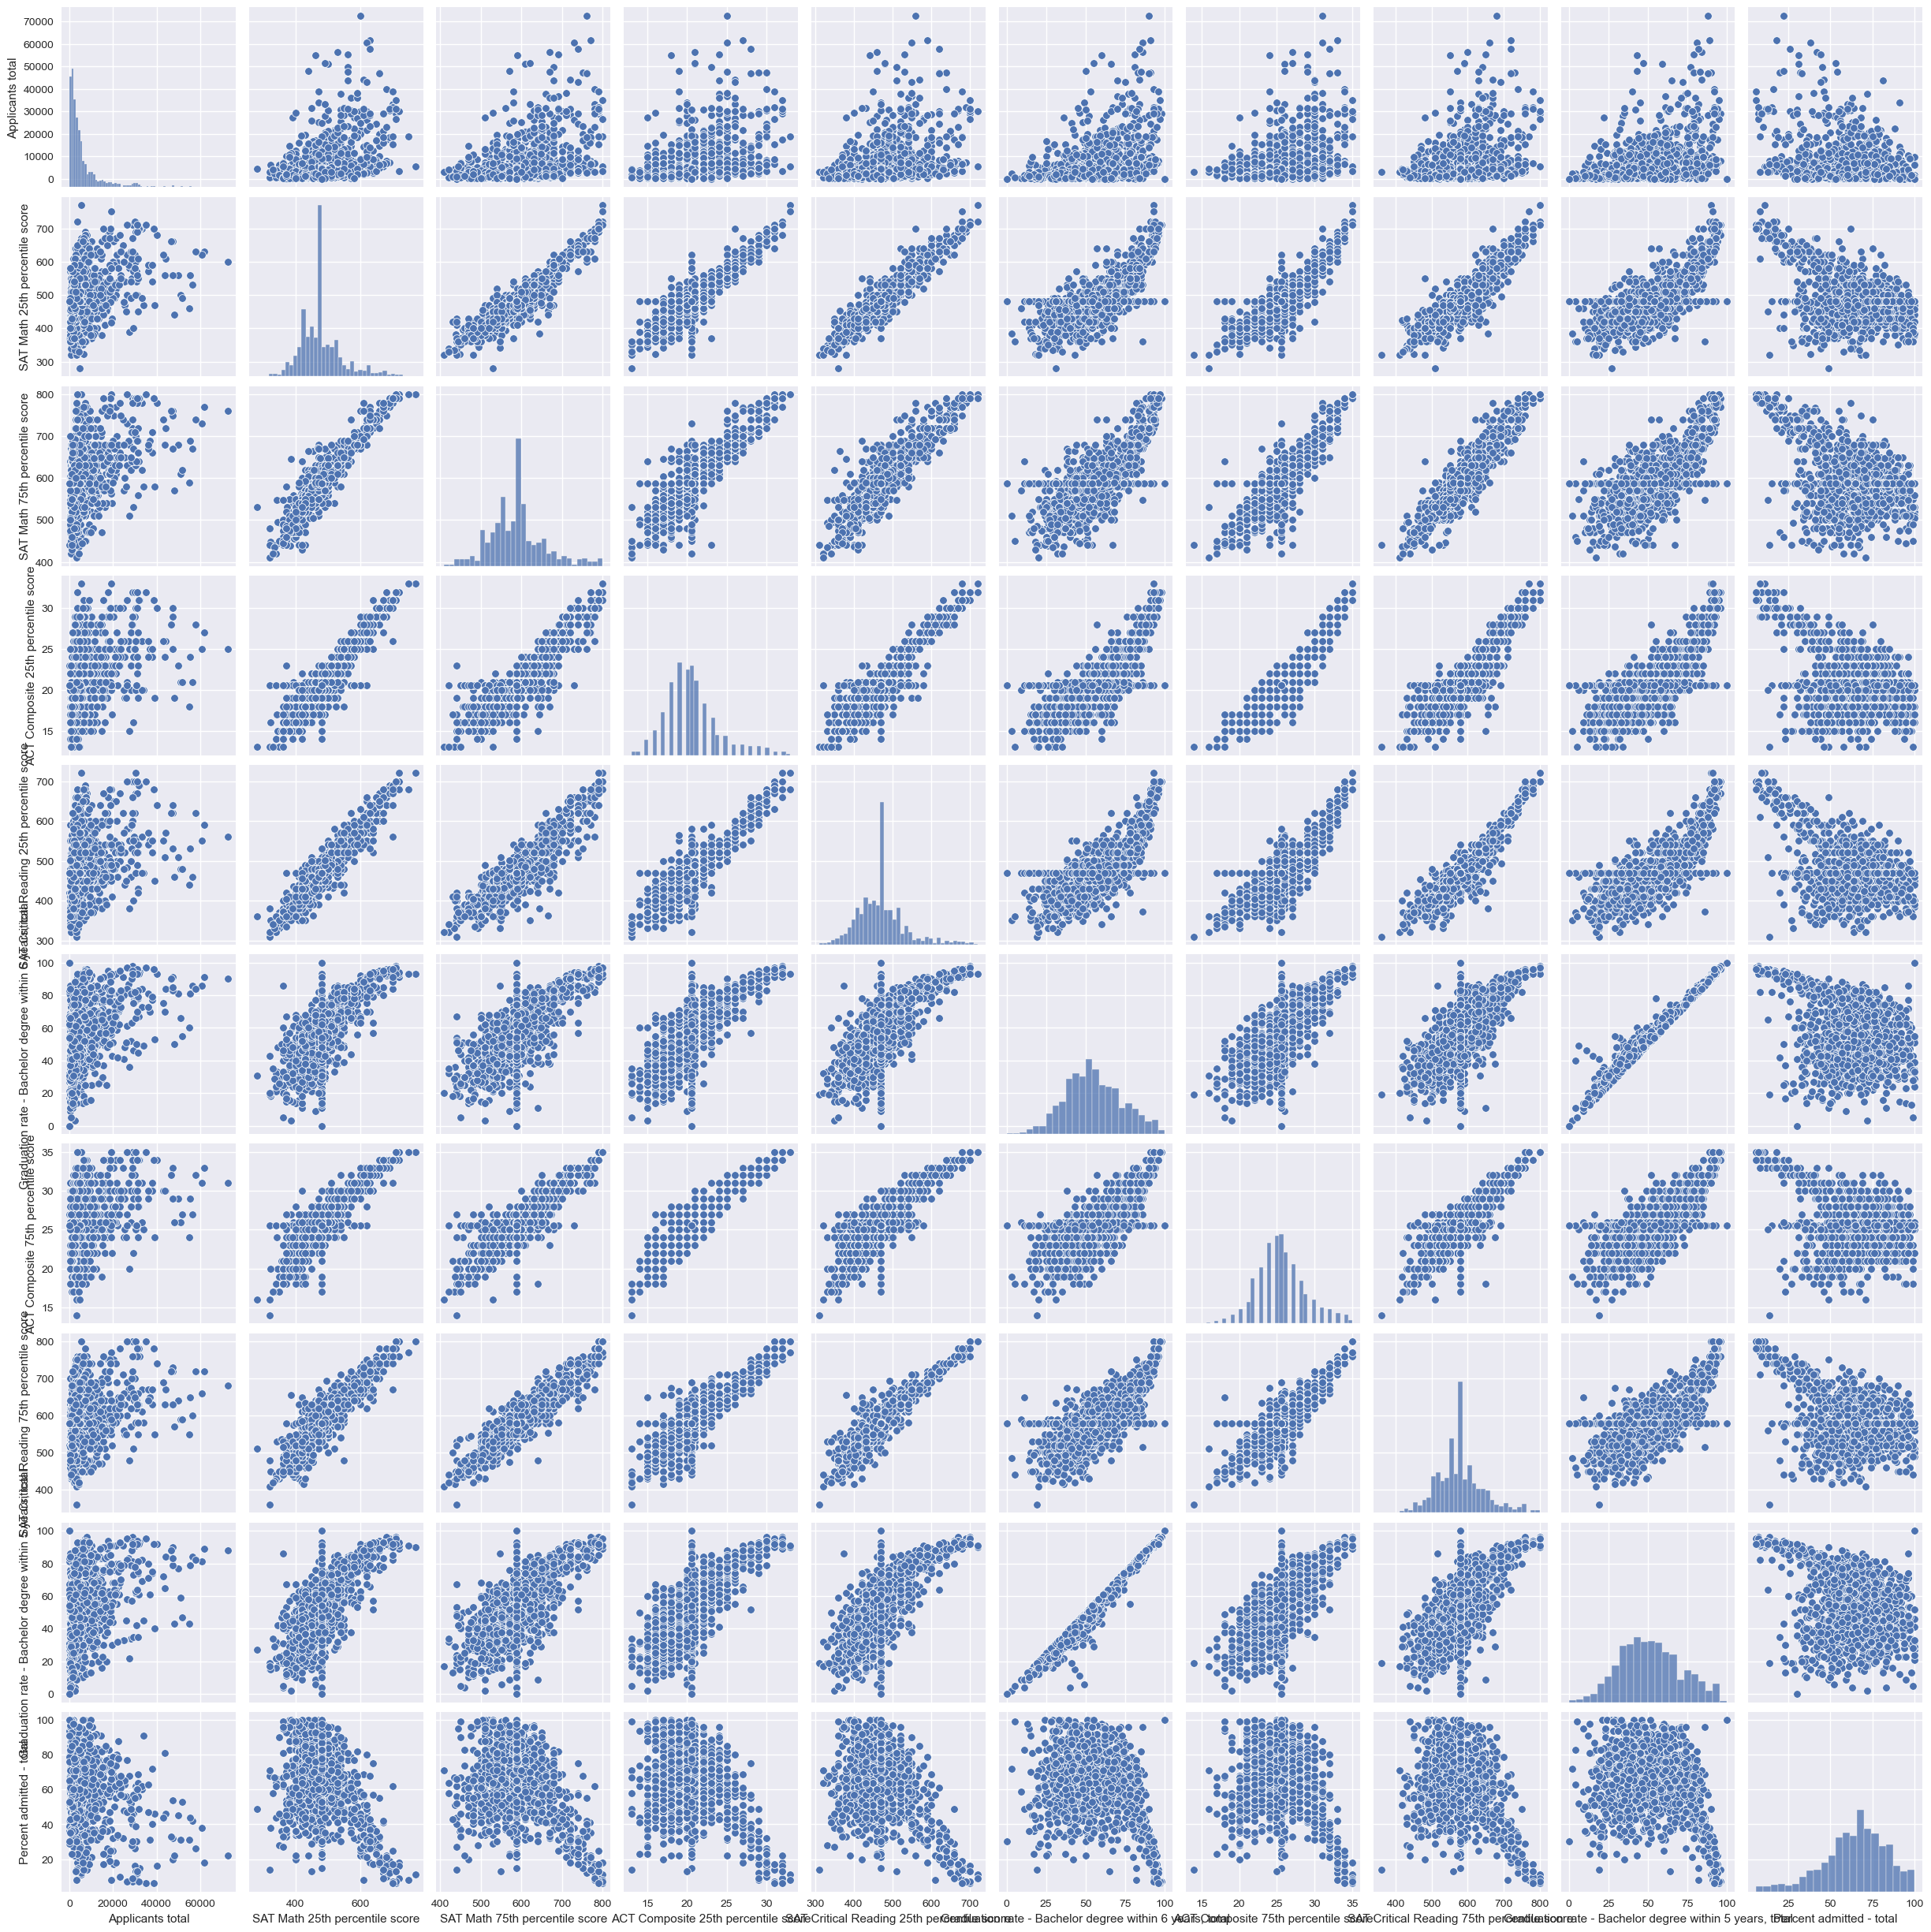

In [16]:

numeric_columns = df_Ca.select_dtypes(include=['float64']).columns

# Select the top ten numeric columns based on correlation with the target variable or other criteria
top_ten_columns = df_Ca[numeric_columns].corr().abs().nlargest(10, 'Applicants total')['Applicants total'].index

# Create pair plots for the top ten columns
sns.pairplot(df_Ca[top_ten_columns])
plt.show()

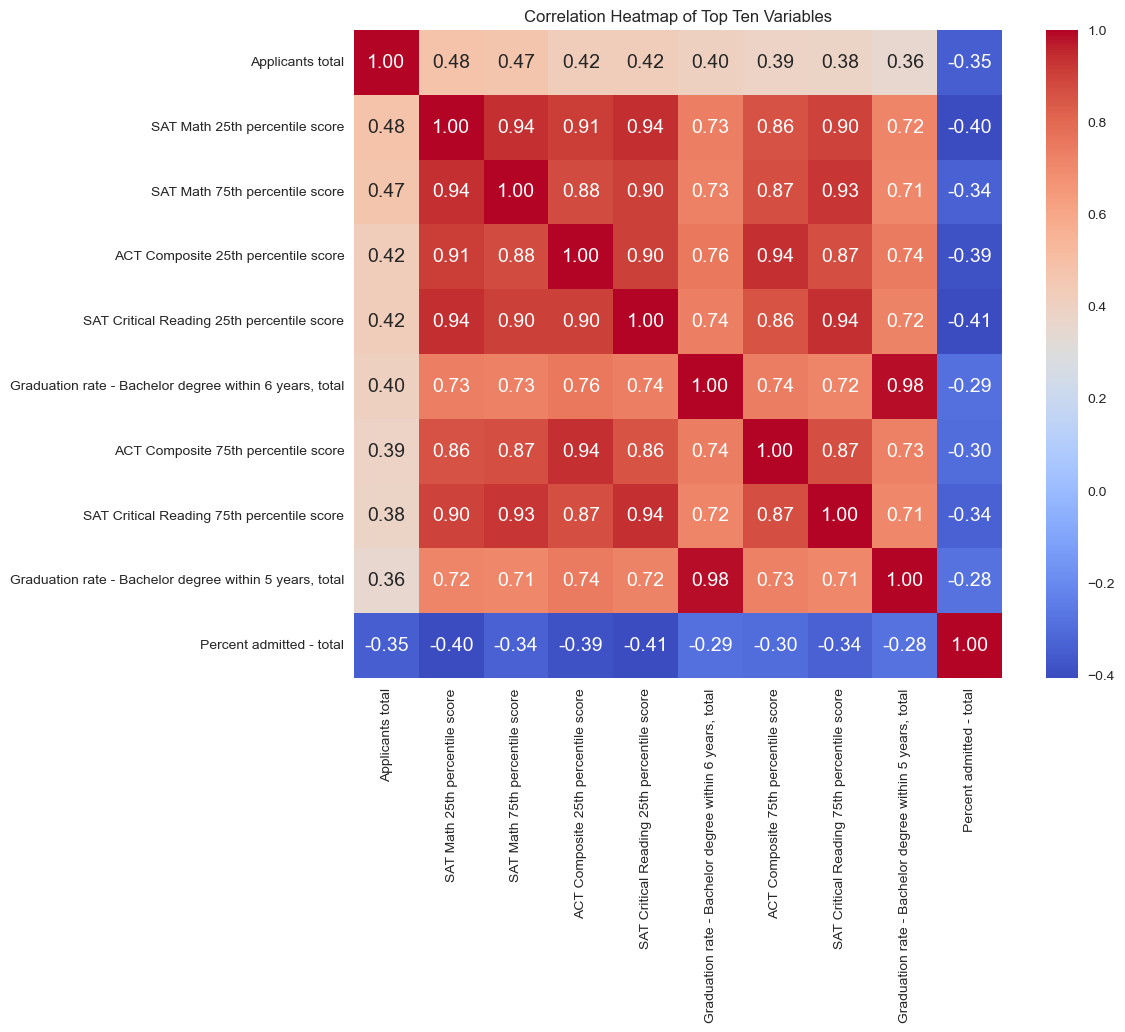

In [17]:
numeric_columns = df_Ca.select_dtypes(include=['float64']).columns

# Select the top ten numeric columns based on correlation
top_ten_columns = df_Ca[numeric_columns].corr().abs().nlargest(10, 'Applicants total')['Applicants total'].index

# Calculate the correlation matrix for the top ten columns
correlation_matrix = df_Ca[top_ten_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Top Ten Variables')
plt.show()

## Split the data and create our y as a categorical variable

In [18]:
# Calculate the mean of the financial aid column
mean_value = df_Ca['Applicants total'].mean()

# Set 'Percent of freshmen receiving any financial aid' to 1 if above the mean, 0 otherwise
df_Ca['Categorical Applicants'] = (df_Ca['Applicants total'] > mean_value).astype(int)

# Display the updated DataFrame
print(df_Ca[['Categorical Applicants']])

      Categorical Applicants
0                          0
1                          0
2                          0
3                          1
4                          1
5                          0
6                          1
7                          0
8                          0
9                          0
10                         0
11                         0
12                         0
13                         0
14                         0
15                         0
16                         0
17                         0
18                         1
19                         0
20                         0
21                         1
22                         0
23                         1
24                         1
25                         0
26                         1
27                         0
28                         0
29                         0
30                         0
31                         1
32                         0
33            

In [19]:
# See what the average value is 
print(mean_value)

6391.193173565723


In [20]:
# Assign the x and y variables
# Drop the columns that are too similar in X

y = df_Ca['Categorical Applicants']
X = df_Ca.drop(['Applicants total', 'Categorical Applicants'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Step 2 Logistic regression

In [21]:
# 3. Fit a logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# 4. Get the coefficients/importance of each predictor
coefficients = logreg_model.coef_[0]
feature_importance = list(zip(X_train.columns, np.abs(coefficients)))



C:\Users\Katabatic\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
# Write the logistic regression equation
print('Logistic Regression Equation:')

# Intercept
intercept = logreg_model.intercept_[0]
print('Intercept:', intercept)

# Coefficients for each feature
for feature, coefficient in zip(X_train.columns, logreg_model.coef_[0]):
    print(f"{coefficient:.4f} * {feature} + ")

Logistic Regression Equation:
Intercept: -5.9538586794750646e-05
0.0001 * SAT Critical Reading 25th percentile score + 
-0.0077 * SAT Critical Reading 75th percentile score + 
0.0034 * SAT Math 25th percentile score + 
-0.0045 * SAT Math 75th percentile score + 
0.0002 * ACT Composite 25th percentile score + 
-0.0003 * ACT Composite 75th percentile score + 
0.0007 * Number of students receiving an Associate's degree + 
-0.0105 * Percent admitted - total + 
0.0011 * Tuition and fees, 2010-11 + 
-0.0012 * Tuition and fees, 2011-12 + 
-0.0003 * Tuition and fees, 2012-13 + 
0.0004 * Tuition and fees, 2013-14 + 
-0.0002 * Total price for in-state students living on campus 2013-14 + 
0.0003 * Total price for out-of-state students living on campus 2013-14 + 
0.0028 * Graduation rate - Bachelor degree within 4 years, total + 
0.0030 * Graduation rate - Bachelor degree within 5 years, total + 
0.0031 * Graduation rate - Bachelor degree within 6 years, total + 
-0.0000 * State abbreviation_Alaba

In [23]:
# 6. Make predictions on the test set
y_pred = logreg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')  # Specify multi_class='ovr'

# Calculate sensitivity and specificity from the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# 8. Print or use the evaluation metrics
print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.7439613526570048
Sensitivity: 0.22413793103448276
Specificity: 0.9463087248322147
Confusion Matrix:
 [[282  16]
 [ 90  26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.95      0.84       298
           1       0.62      0.22      0.33       116

    accuracy                           0.74       414
   macro avg       0.69      0.59      0.59       414
weighted avg       0.72      0.74      0.70       414

ROC AUC Score: 0.5852233279333487


#### Our accuracy score is .74. This means that our model is correctly classifying 74% which is ok but could be better. We are making quite a few Type II errors however which means that we are predicting negative when it is actually positive. Our model is very good at finding TN based upon specificty, but our sensitivity (finding true positives) does not have a good rate. We are interested in what gets us the most applicants, so having a bad sensitivity will hinder our ability to use this model. 

## Step 3 Decision Tree

In [24]:
# Create the tree, fit the tree, and make the predictions
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

In [25]:
# Get feature importances
feature_importance = list(zip(X_test.columns, dt_classifier.feature_importances_))

# Sort feature importances in descending order
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Print feature importances
print("Feature Importance (Descending Order):")
for feature, importance in feature_importance:
    print(f"{feature}: {importance:.4f}")

Feature Importance (Descending Order):
Carnegie Classification 2010: Basic_Research Universities (very high research activity): 0.1977
Carnegie Classification 2010: Basic_Research Universities (high research activity): 0.1022
Total price for out-of-state students living on campus 2013-14: 0.0816
SAT Math 25th percentile score: 0.0598
Percent admitted - total: 0.0574
Tuition and fees, 2012-13: 0.0488
Graduation rate - Bachelor degree within 6 years, total: 0.0444
SAT Math 75th percentile score: 0.0407
Tuition and fees, 2010-11: 0.0384
Total price for in-state students living on campus 2013-14: 0.0341
Graduation rate - Bachelor degree within 4 years, total: 0.0328
Graduation rate - Bachelor degree within 5 years, total: 0.0322
ACT Composite 75th percentile score: 0.0285
Carnegie Classification 2010: Basic_Master's Colleges and Universities (larger programs): 0.0239
Carnegie Classification 2010: Basic_Doctoral/Research Universities: 0.0171
Tuition and fees, 2011-12: 0.0152
State abbreviat

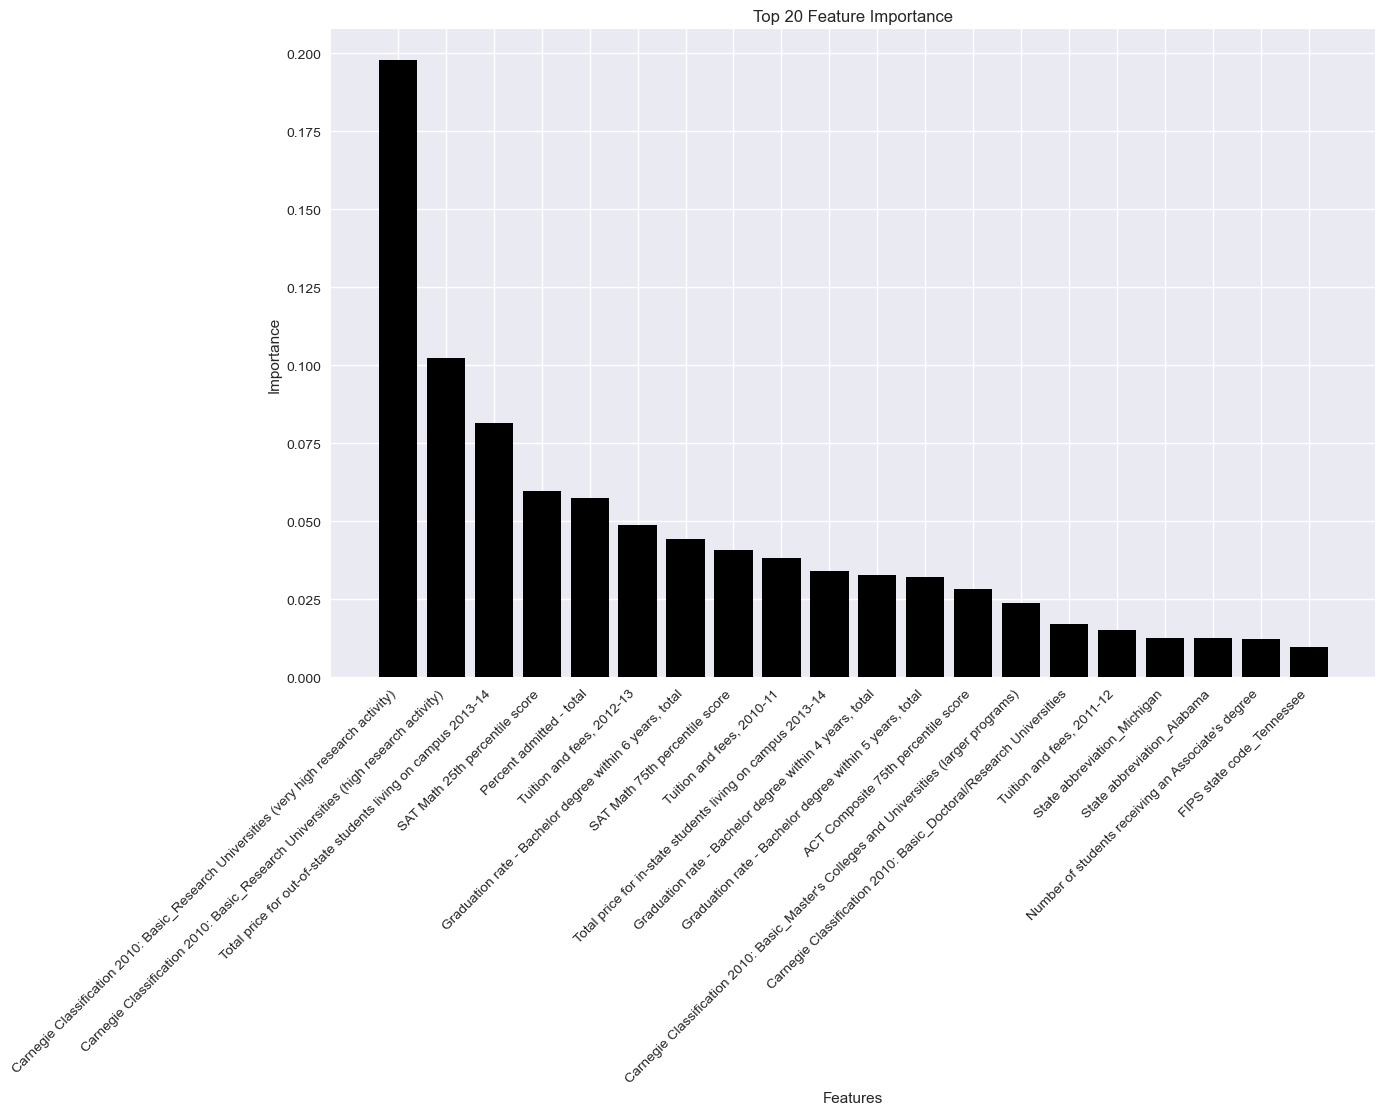

In [26]:
# Get the top 20 feature importances
top_features = feature_importance[:20]

# Extract feature names and importances for the top 20 features
top_feature_names, top_importances = zip(*top_features)

# Create a bar plot for the top 20 features
plt.figure(figsize=(12, 8))
plt.bar(top_feature_names, top_importances, color='black')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 20 Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.show()

As we can see, promoting and investing in research at our school will be the number one and number two biggest factors for recieving more applications. We also see that allowing more people to enter our school will allow us to get more applicants. 

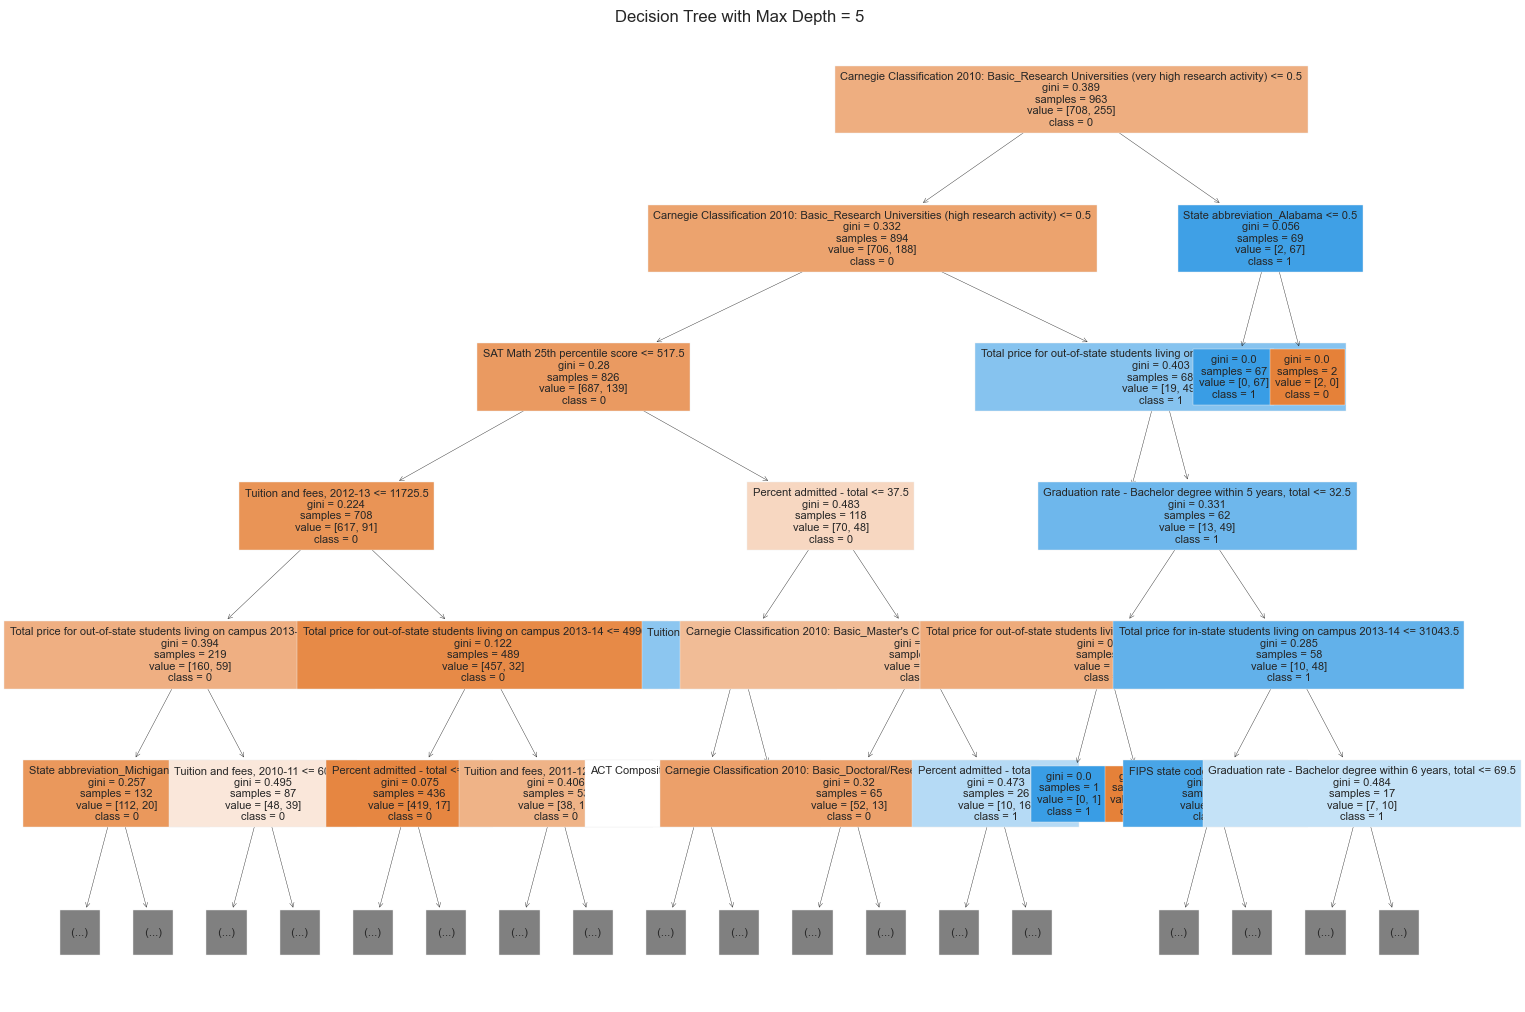

In [27]:
plt.figure(figsize=(16, 12))
plot_tree(dt_classifier, filled=True, feature_names=X_train.columns, class_names=['0', '1'], max_depth=5, fontsize=8)
plt.title("Decision Tree with Max Depth = 5")
plt.show()

Iteration 1 done
Iteration 2 done
Iteration 3 done
Iteration 4 done
Iteration 5 done
Iteration 6 done
Iteration 7 done
Iteration 8 done
Iteration 9 done
Iteration 10 done
Iteration 11 done
Iteration 12 done
Iteration 13 done
Iteration 14 done
Iteration 15 done
Iteration 16 done
Iteration 17 done
Iteration 18 done
Iteration 19 done
Iteration 20 done
Iteration 21 done
Iteration 22 done
Iteration 23 done
Iteration 24 done
Iteration 25 done
Iteration 26 done
Iteration 27 done
Iteration 28 done
Iteration 29 done


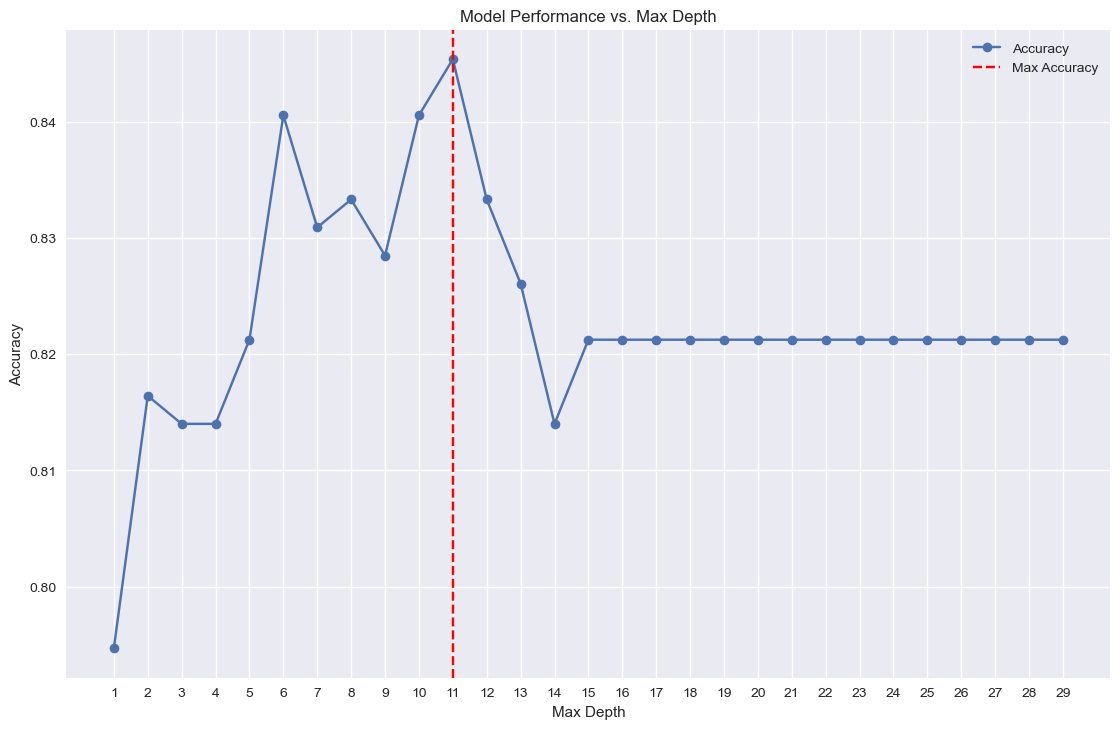

In [28]:
max_depths = range(1, 30)
scores = []

# Train Decision Tree models with different max depths
for depth in max_depths:
    classifier = DecisionTreeClassifier(max_depth=depth, random_state=21)
    classifier.fit(X_train, y_train)
    scores.append(classifier.score(X_test, y_test))
    print(f"Iteration {depth} done")

# Find the index of max accuracy
max_accuracy_index = scores.index(max(scores))

# Plot accuracy vs. max depth
plt.figure(figsize=(12, 8))
plt.plot(max_depths, scores, '-o', label='Accuracy')
plt.axvline(x=max_depths[max_accuracy_index], color='r', linestyle='--', label='Max Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Model Performance vs. Max Depth')
plt.xticks(max_depths)
plt.legend()
plt.show()

In [29]:
# from sklearn.model_selection import RandomizedSearchCV

# vartrain = X_train
# vartest = X_test

# grid={"criterion": ['gini', 'entropy'], "max_depth" : [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
#       "max_leaf_nodes" : [2, 3, 4, 8, 9, 10],
#       "class_weight": [None, 'balanced', {0:1, 1:1.5}, {0:1, 1:2}, {0:1, 1:3}]}
# model_random = DecisionTreeClassifier(random_state = 21)
# model_cv=RandomizedSearchCV(model_random,grid,cv=5)
# model_cv.fit(vartrain,y_train)

# print("tuned hyperparameters :(best parameters) ",model_cv.best_params_)
# print("accuracy :",model_cv.best_score_)

Based upon the plot above, we see that our max depth should be 11.

In [30]:
dt_best = DecisionTreeClassifier(max_depth=11, random_state=21)

# Train the final model on the entire training dataset
dt_best.fit(X_train, y_train)

# Evaluate the final model on the test dataset
final_accuracy = dt_best.score(X_test, y_test)
print(f"Final Model Accuracy: {final_accuracy:.4f}")

Final Model Accuracy: 0.8454


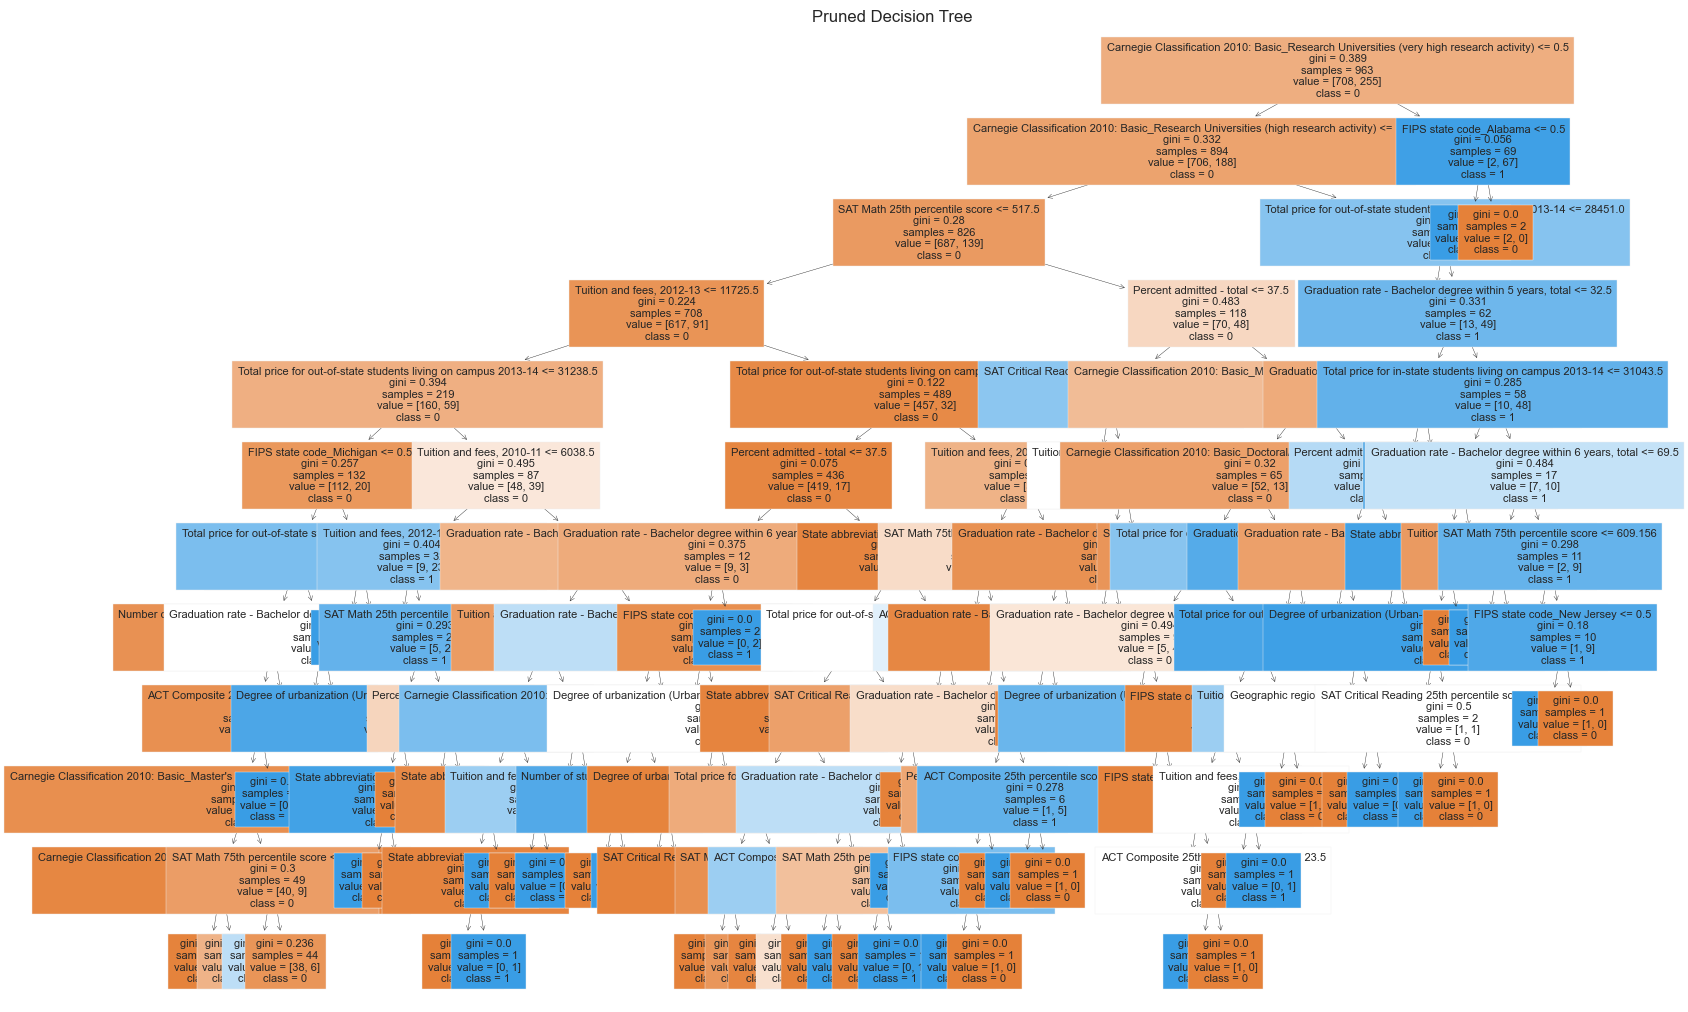

In [31]:
plt.figure(figsize=(16, 12))
plot_tree(dt_best, filled=True, feature_names=X.columns, class_names=['0', '1'], fontsize = 8)
plt.title("Pruned Decision Tree")
plt.show()


In [32]:
y_prob = dt_best.predict_proba(X_test)[:, 1]  # Probability of the positive class
y_pred = dt_best.predict(X_test)  # Predicted labels

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Calculate sensitivity and specificity from the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# 8. Print or use the evaluation metrics
print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.8454106280193237
Sensitivity: 0.6551724137931034
Specificity: 0.9194630872483222
Confusion Matrix:
 [[274  24]
 [ 40  76]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.90       298
           1       0.76      0.66      0.70       116

    accuracy                           0.85       414
   macro avg       0.82      0.79      0.80       414
weighted avg       0.84      0.85      0.84       414

ROC AUC Score: 0.7725208285119185


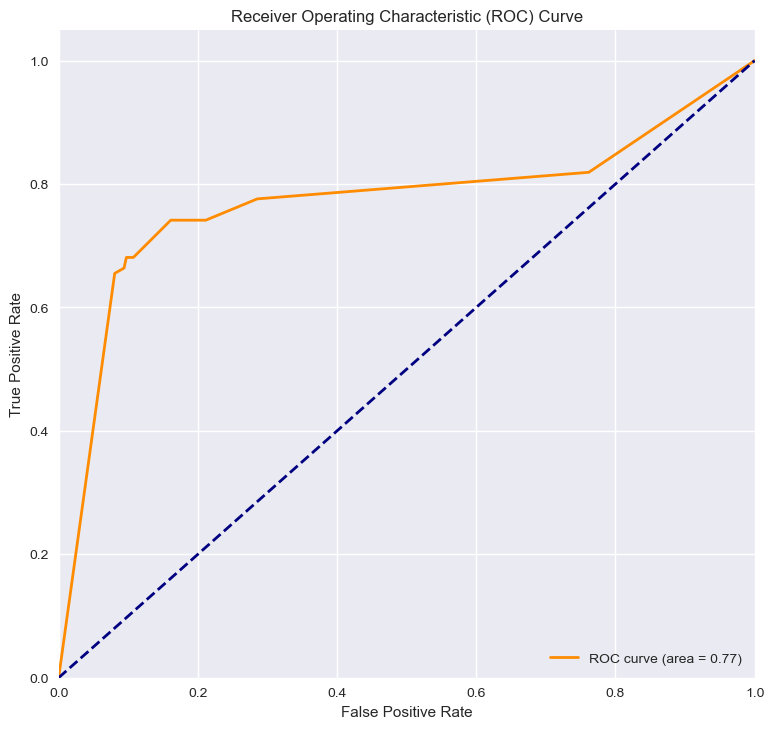

ROC AUC Score: 0.7725208285119185


In [33]:
y_prob = dt_best.predict_proba(X_test)[:, 1]  # Probability of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("ROC AUC Score:", roc_auc)

#### This model is performing better than our logistic regression model. We have an accuracy rate of .85 which is better with the biggest improvment being in our sensitivty meaning that we are predicting true postives better. This is very important to us because we want to see what draws in the most applicants. With this only being one tree, we should see a large improvement when going to the random forest. 

## Step 4 Random Forest

In [34]:
# Create the model, fit the model, predeict on the model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

In [35]:
# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])

# Print or use the evaluation metrics
print("Step 2: Evaluate Random Forest Classifier")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)
print("ROC AUC Score:", roc_auc)

Step 2: Evaluate Random Forest Classifier
Accuracy: 0.855072463768116
Confusion Matrix:
 [[280  18]
 [ 42  74]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       298
           1       0.80      0.64      0.71       116

    accuracy                           0.86       414
   macro avg       0.84      0.79      0.81       414
weighted avg       0.85      0.86      0.85       414

ROC AUC Score: 0.9182914834529045


In [36]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best hyperparameters from the grid search
best_params = grid_search.best_params_
print(best_params)

{'class_weight': None, 'max_depth': 20, 'n_estimators': 100}


In [37]:
# Fit the final Random Forest model with the best hyperparameters
rf_best = RandomForestClassifier(random_state=42, **best_params)
rf_best.fit(X_train, y_train)

# Explain the importance of each predictor
feature_importance = list(zip(X_train.columns, rf_best.feature_importances_))
feature_importance.sort(key=lambda x: x[1], reverse=True)

print("\nStep 5: Feature Importance")
for feature, importance in feature_importance:
    print(f"{feature}: {importance:.4f}")


Step 5: Feature Importance
Total price for out-of-state students living on campus 2013-14: 0.0517
SAT Math 75th percentile score: 0.0510
Tuition and fees, 2011-12: 0.0477
Tuition and fees, 2012-13: 0.0470
Total price for in-state students living on campus 2013-14: 0.0466
SAT Math 25th percentile score: 0.0461
Tuition and fees, 2010-11: 0.0459
Graduation rate - Bachelor degree within 6 years, total: 0.0441
Tuition and fees, 2013-14: 0.0415
SAT Critical Reading 25th percentile score: 0.0396
Graduation rate - Bachelor degree within 5 years, total: 0.0395
Percent admitted - total: 0.0365
Graduation rate - Bachelor degree within 4 years, total: 0.0326
Carnegie Classification 2010: Basic_Research Universities (very high research activity): 0.0314
SAT Critical Reading 75th percentile score: 0.0312
ACT Composite 25th percentile score: 0.0243
ACT Composite 75th percentile score: 0.0227
Control of institution_Public: 0.0223
Carnegie Classification 2010: Basic_Baccalaureate Colleges--Arts & Scie

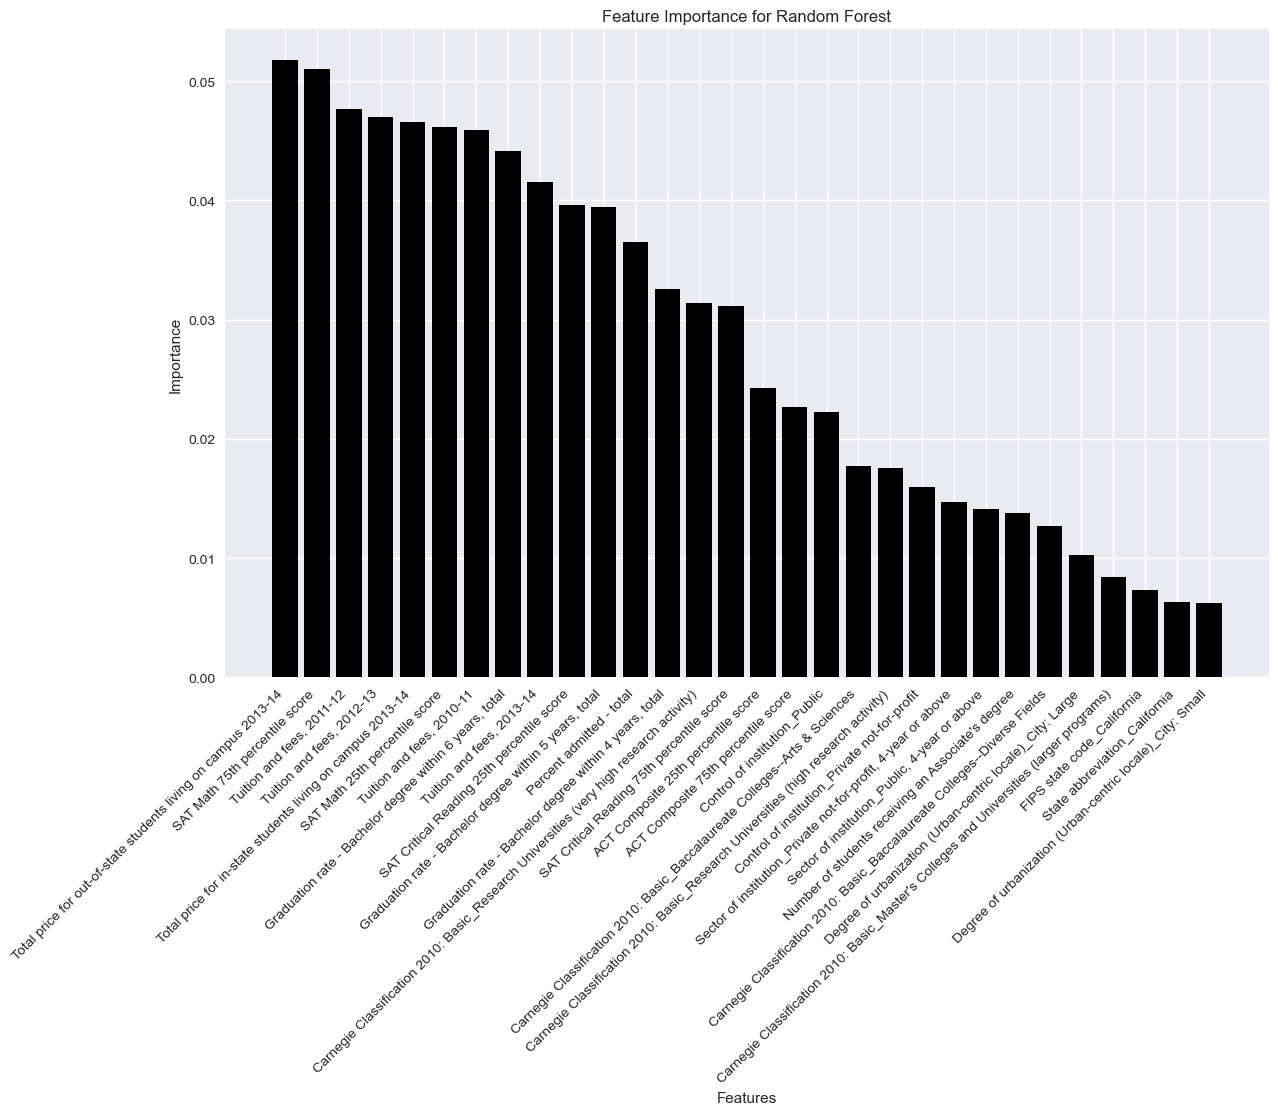

In [38]:
features, importances = zip(*feature_importance)

# Create a bar plot to visualize the importance of the features
plt.figure(figsize=(12, 8))
plt.bar(features[:30], importances[:30], color='Black')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance for Random Forest')
plt.xticks(rotation=45, ha='right')
plt.show()

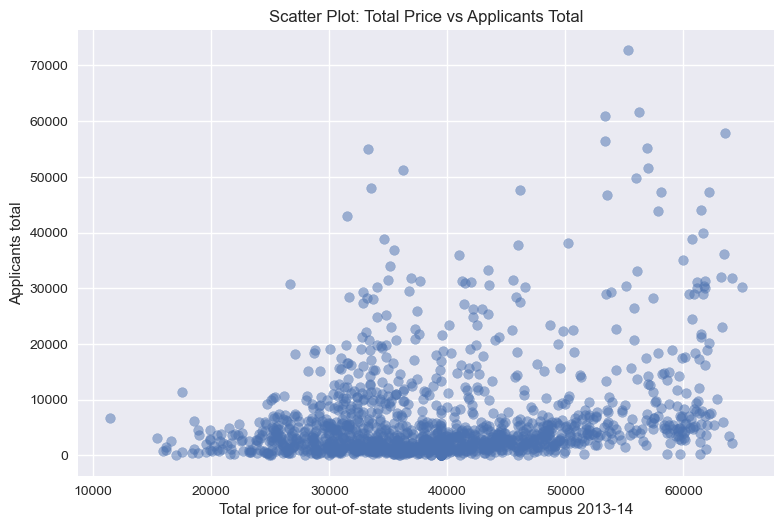

In [39]:
# We see the importance of these features, but we need to plot their basic relationship with the target variable to see the direction.
# Extract the relevant columns 
x_data = df_Ca['Total price for out-of-state students living on campus 2013-14']
y_data = df_Ca['Applicants total']

# Create a scatter plot
plt.scatter(x_data, y_data, alpha=0.5)
plt.title('Scatter Plot: Total Price vs Applicants Total')
plt.xlabel('Total price for out-of-state students living on campus 2013-14')
plt.ylabel('Applicants total')
plt.show()

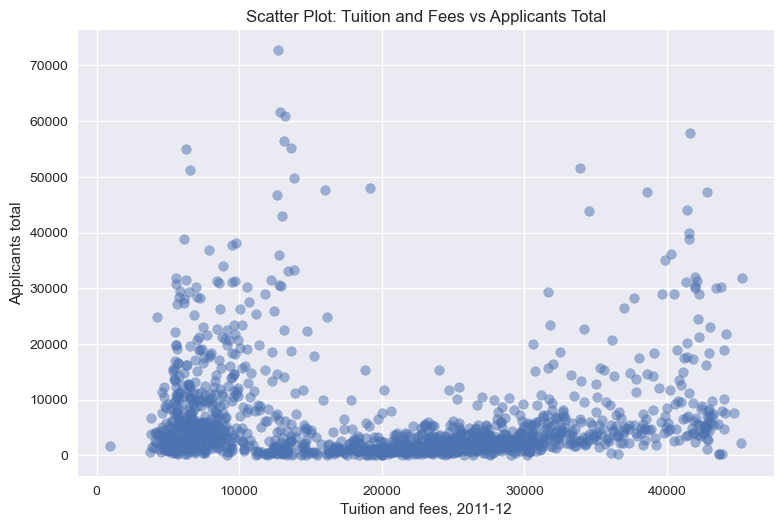

In [40]:
# Extract the relevant columns
x_data_tuition = df_Ca['Tuition and fees, 2011-12']
y_data_applicants = df_Ca['Applicants total']

# Create a scatter plot
plt.scatter(x_data_tuition, y_data_applicants, alpha=0.5)
plt.title('Scatter Plot: Tuition and Fees vs Applicants Total')
plt.xlabel('Tuition and fees, 2011-12')
plt.ylabel('Applicants total')
plt.show()

#### What is interesting is that if we look at the features of most importance and plot them against applicants total to see their relationship direction, we see that out of state students are more likely to send an application in if the price of the school is high. However, we see a negative trend for the most part that if the tuition and fees increase, total applicants decrease. 

In [41]:
y_pred_best = rf_best.predict(X_test)
y_prob_best = rf_best.predict_proba(X_test)[:, 1]

# Calculate accuracy and other metrics for the final model
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
classification_rep_best = classification_report(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_prob_best)

# Calculate sensitivity and specificity
tn, fp, fn, tp = conf_matrix_best.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Print or use the evaluation metrics for the final model
print("\nStep 6: Evaluate Final Random Forest Model")
print("Accuracy:", accuracy_best)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("ROC AUC Score:", roc_auc_best)
print("Confusion Matrix:\n", conf_matrix_best)
print("Classification Report:\n", classification_rep_best)


Step 6: Evaluate Final Random Forest Model
Accuracy: 0.855072463768116
Sensitivity: 0.646551724137931
Specificity: 0.9362416107382551
ROC AUC Score: 0.9164111316824809
Confusion Matrix:
 [[279  19]
 [ 41  75]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       298
           1       0.80      0.65      0.71       116

    accuracy                           0.86       414
   macro avg       0.83      0.79      0.81       414
weighted avg       0.85      0.86      0.85       414



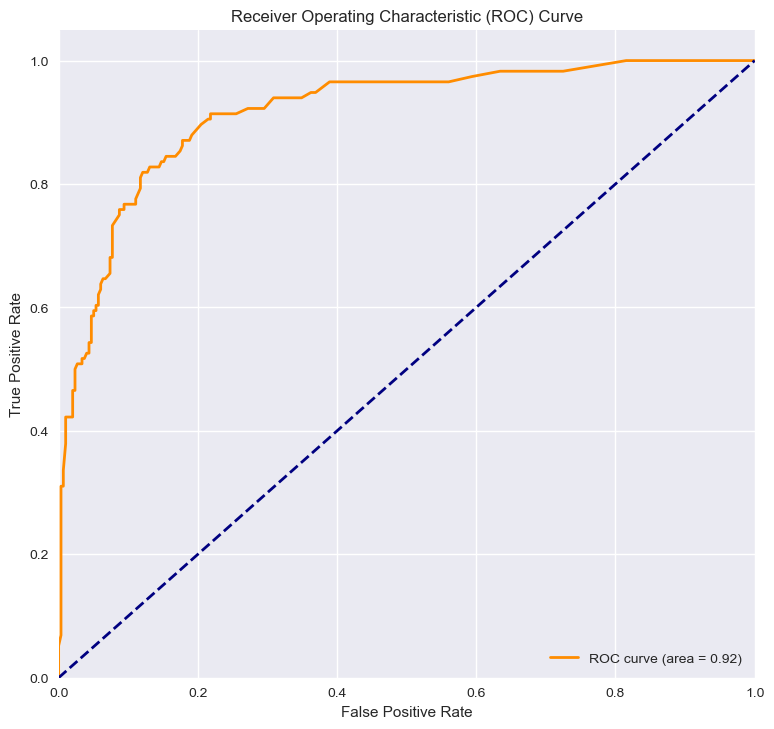

In [42]:
y_prob_best = rf_best.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_best)

# Calculate the ROC AUC score
roc_auc_best = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_best))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### We didn't see as large of an improvment as we thought we would. It is still the best model that we produced though with an accuracy of .86. 

## Step 5

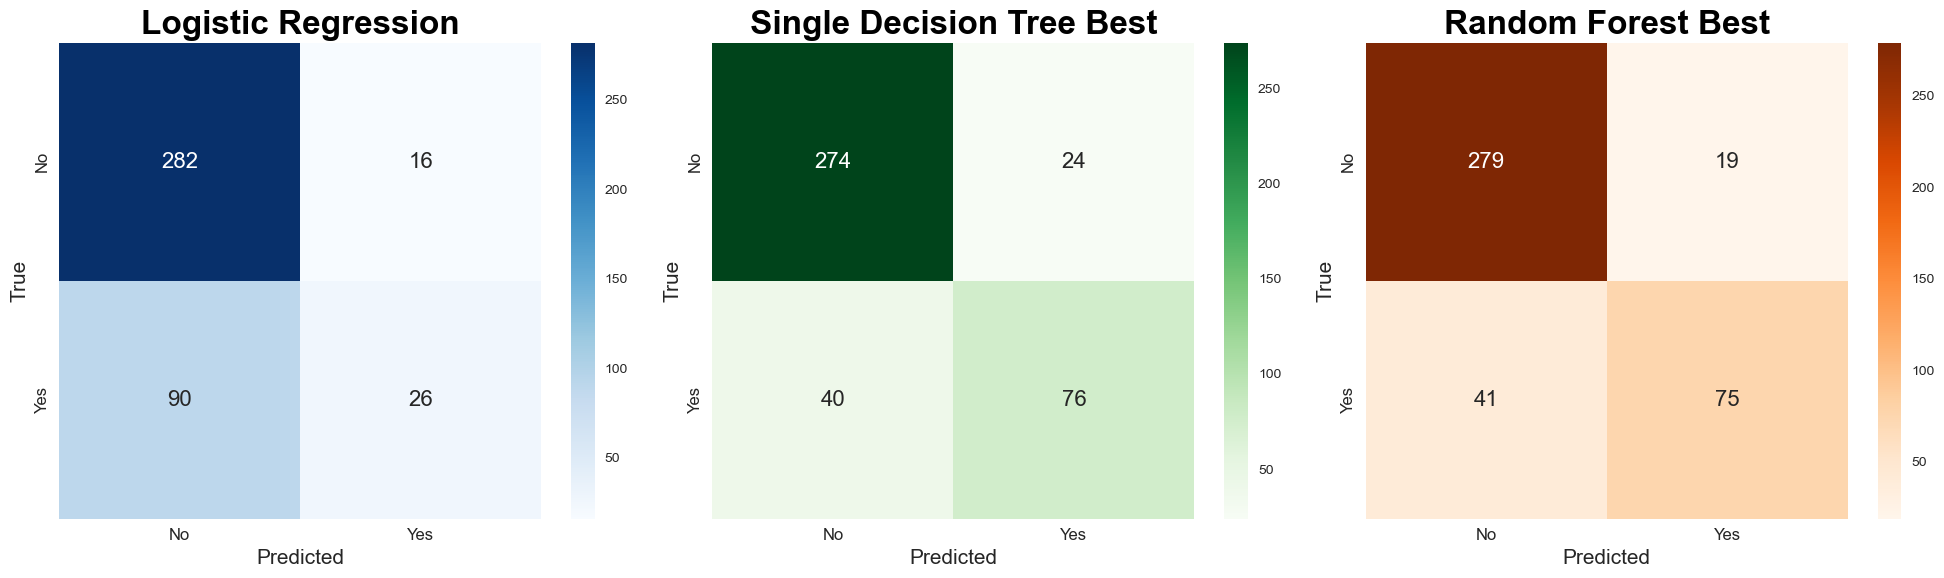

In [43]:
y_pred_logistic = logreg_model.predict(X_test)
y_pred_dt_best = dt_best.predict(X_test)
y_pred_rf_best = rf_best.predict(X_test)

# Calculate confusion matrices
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
cm_dt_best = confusion_matrix(y_test, y_pred_dt_best)
cm_rf_best = confusion_matrix(y_test, y_pred_rf_best)

# Plot the confusion matrices side by side
plt.figure(figsize=(20, 6))

plt.subplot(131)
plt.title('Logistic Regression', fontweight='bold', color='black', fontsize='24', horizontalalignment='center')
chart_logistic = sns.heatmap(cm_logistic, annot=True, cmap="Blues", annot_kws={"size": 16}, fmt="g")
chart_logistic.set_xlabel('Predicted', fontsize=15)
chart_logistic.set_ylabel('True', fontsize=15)
chart_logistic.xaxis.set_ticklabels(['No', 'Yes'], fontsize=12)
chart_logistic.yaxis.set_ticklabels(['No', 'Yes'], fontsize=12, va='center')

plt.subplot(132)
plt.title('Single Decision Tree Best', fontweight='bold', color='black', fontsize='24', horizontalalignment='center')
chart_dt_best = sns.heatmap(cm_dt_best, annot=True, cmap="Greens", annot_kws={"size": 16}, fmt="g")
chart_dt_best.set_xlabel('Predicted', fontsize=15)
chart_dt_best.set_ylabel('True', fontsize=15)
chart_dt_best.xaxis.set_ticklabels(['No', 'Yes'], fontsize=12)
chart_dt_best.yaxis.set_ticklabels(['No', 'Yes'], fontsize=12, va='center')

plt.subplot(133)
plt.title('Random Forest Best', fontweight='bold', color='black', fontsize='24', horizontalalignment='center')
chart_rf_best = sns.heatmap(cm_rf_best, annot=True, cmap="Oranges", annot_kws={"size": 16}, fmt="g")
chart_rf_best.set_xlabel('Predicted', fontsize=15)
chart_rf_best.set_ylabel('True', fontsize=15)
chart_rf_best.xaxis.set_ticklabels(['No', 'Yes'], fontsize=12)
chart_rf_best.yaxis.set_ticklabels(['No', 'Yes'], fontsize=12, va='center')

plt.tight_layout()
plt.show()

In [44]:
y_pred_logi_best = logreg_model.predict(X_test)
y_pred_dt_best = dt_best.predict(X_test)
y_pred_rf_best = rf_best.predict(X_test)

def calculate_sensitivity_specificity_binary(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity
# Create a DataFrame to store the predictions
df_scores = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree Best', 'Random Forest Best'],
    'Accuracy': [accuracy_score(y_test, y_pred_logi_best), accuracy_score(y_test, y_pred_dt_best), accuracy_score(y_test, y_pred_rf_best)],
    'ROC AUC': [roc_auc_score(y_test, logreg_model.predict_proba(X_test)[:, 1]), roc_auc_score(y_test, dt_best.predict_proba(X_test)[:, 1]), roc_auc_score(y_test, rf_best.predict_proba(X_test)[:, 1])],
    'Sensitivity': [calculate_sensitivity_specificity_binary(y_test, y_pred_logi_best)[0], calculate_sensitivity_specificity_binary(y_test, y_pred_dt_best)[0], calculate_sensitivity_specificity_binary(y_test, y_pred_rf_best)[0]],
    'Specificity': [calculate_sensitivity_specificity_binary(y_test, y_pred_logi_best)[1], calculate_sensitivity_specificity_binary(y_test, y_pred_dt_best)[1], calculate_sensitivity_specificity_binary(y_test, y_pred_rf_best)[1]],
})

print(df_scores)


                 Model  Accuracy   ROC AUC  Sensitivity  Specificity
0  Logistic Regression  0.743961  0.777019     0.224138     0.946309
1   Decision Tree Best  0.845411  0.772521     0.655172     0.919463
2   Random Forest Best  0.855072  0.916411     0.646552     0.936242


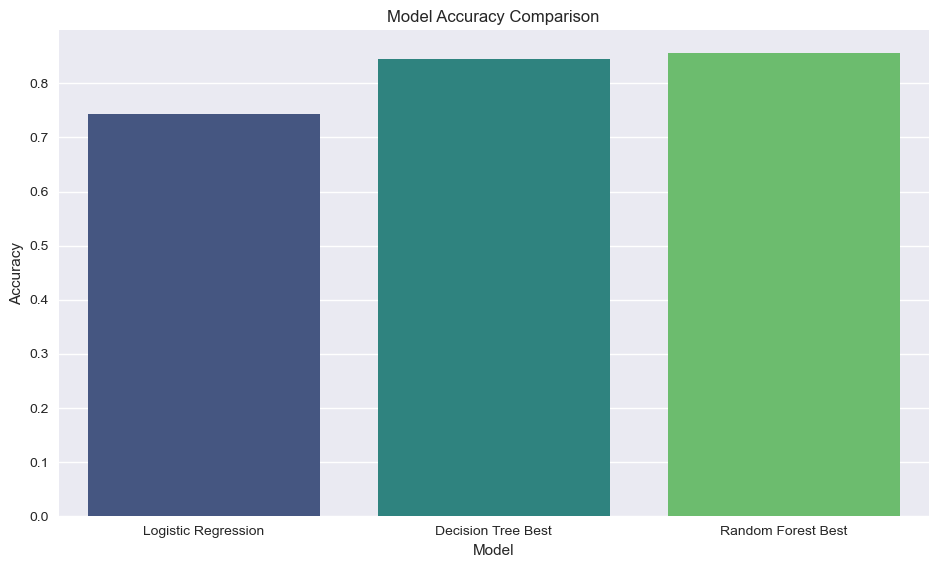

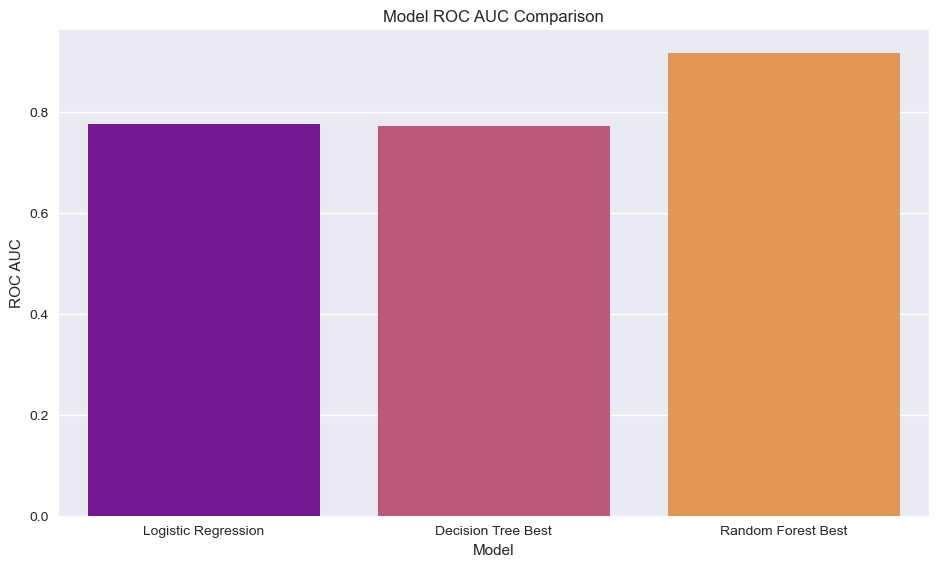

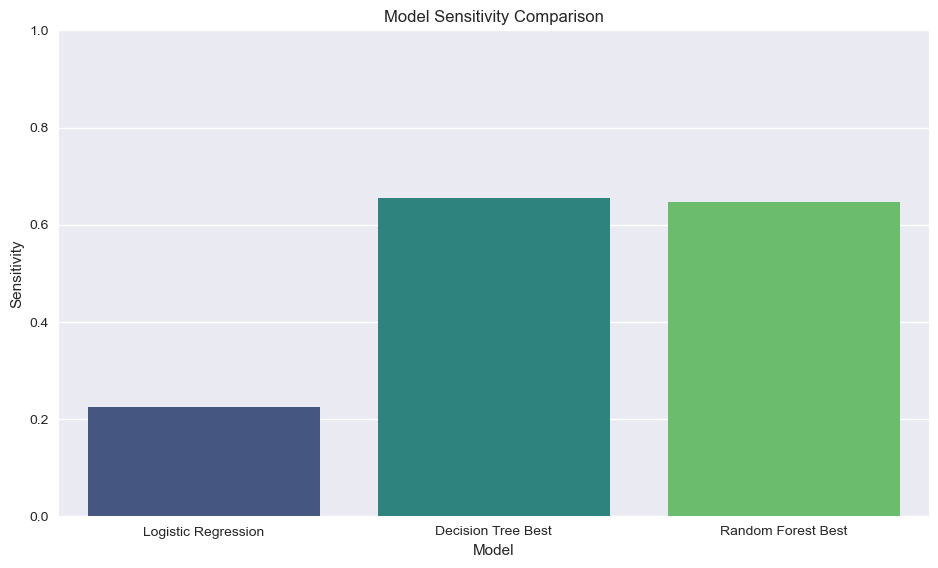

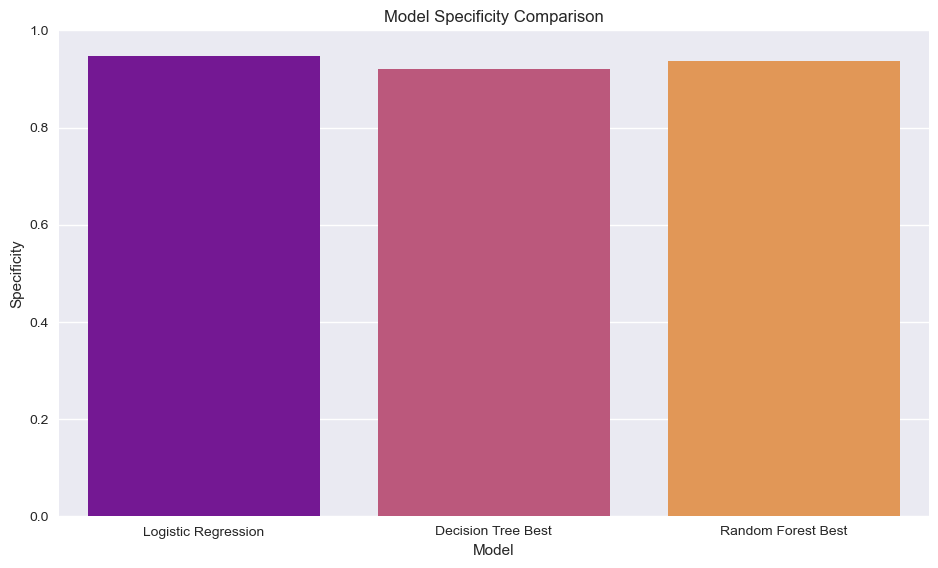

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df_scores, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.show()

# Bar plot for ROC AUC
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='ROC AUC', data=df_scores, palette='plasma')
plt.title('Model ROC AUC Comparison')
plt.show()

# Bar plot for Sensitivity
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Sensitivity', data=df_scores, palette='viridis')
plt.title('Model Sensitivity Comparison')
plt.ylim(0, 1)  # Adjust the y-axis limit if sensitivity values are between 0 and 1
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Specificity', data=df_scores, palette='plasma')
plt.title('Model Specificity Comparison')
plt.ylim(0, 1)  # Adjust the y-axis limit if specificity values are between 0 and 1
plt.show()

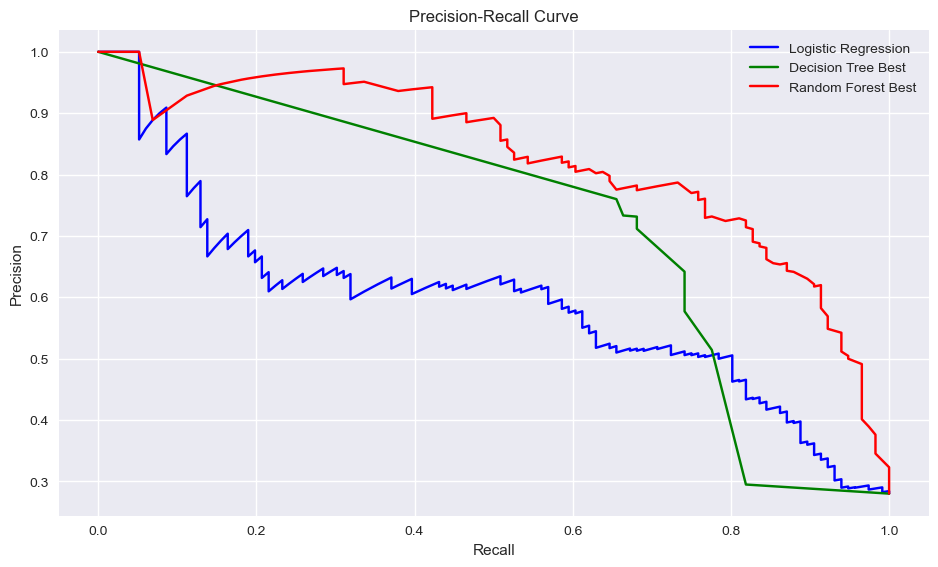

In [46]:
precision_logi_best, recall_logi_best, _ = precision_recall_curve(y_test, logreg_model.predict_proba(X_test)[:, 1])
precision_dt_best, recall_dt_best, _ = precision_recall_curve(y_test, dt_best.predict_proba(X_test)[:, 1])
precision_rf_best, recall_rf_best, _ = precision_recall_curve(y_test, rf_best.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(recall_logi_best, precision_logi_best, label='Logistic Regression', color='blue')
plt.plot(recall_dt_best, precision_dt_best, label='Decision Tree Best', color='green')
plt.plot(recall_rf_best, precision_rf_best, label='Random Forest Best', color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

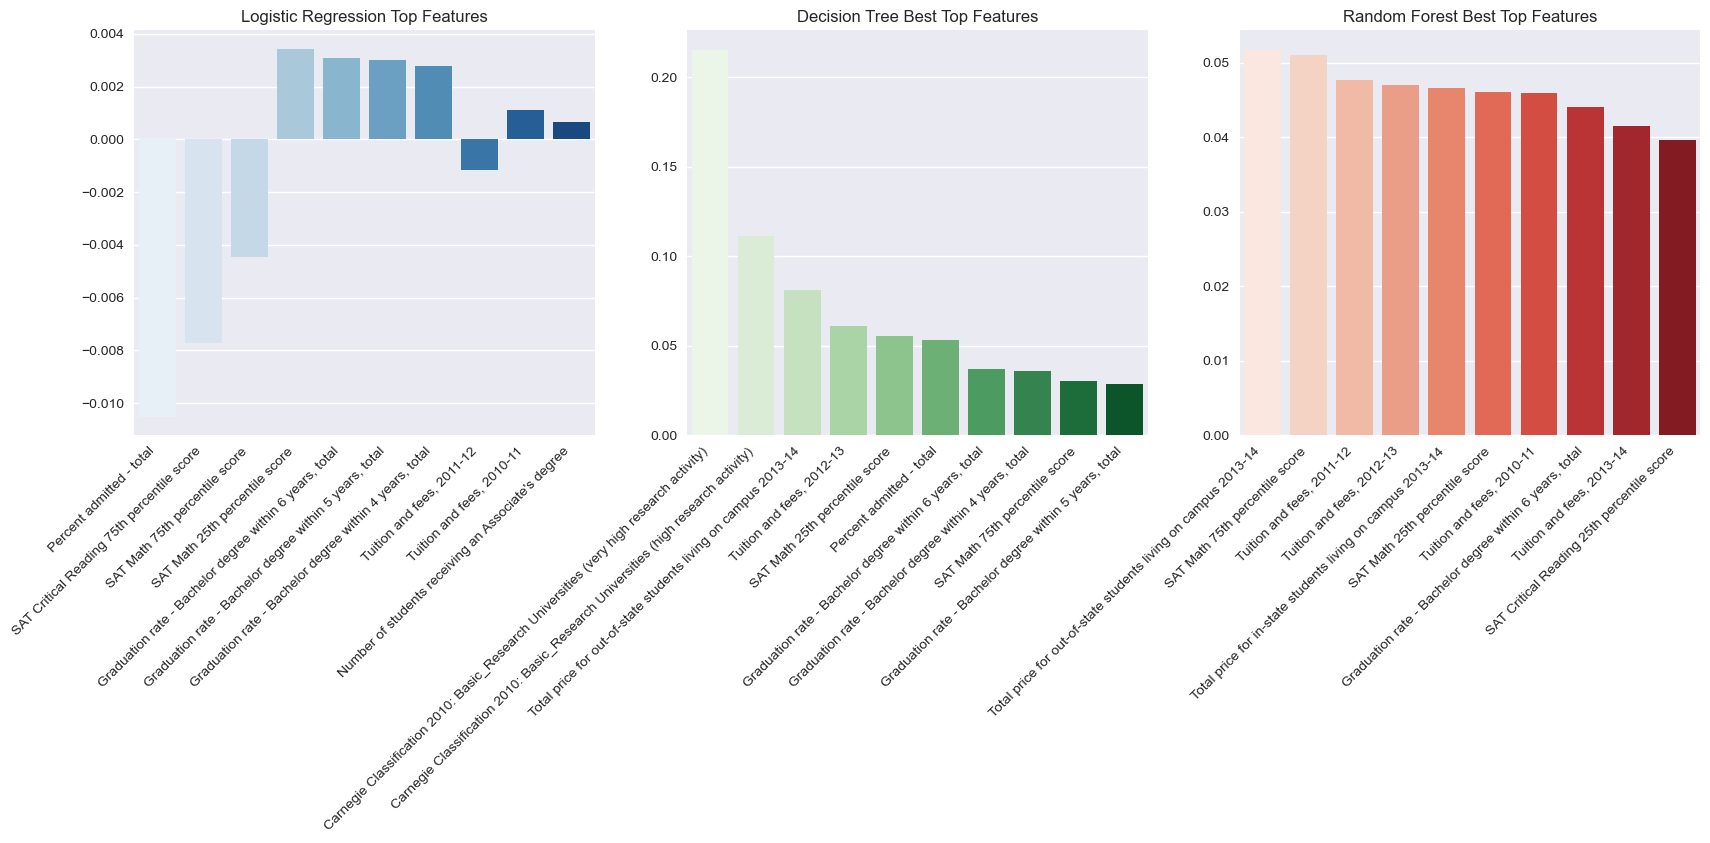

In [47]:
# Extract feature importances for Logistic Regression
feature_importance_logi_best = list(zip(X_train.columns, logreg_model.coef_[0]))
feature_importance_logi_best.sort(key=lambda x: abs(x[1]), reverse=True)
top_features_logi_best = feature_importance_logi_best[:10]

# Extract feature importances for Decision Tree Best
feature_importance_dt_best = list(zip(X_train.columns, dt_best.feature_importances_))
feature_importance_dt_best.sort(key=lambda x: x[1], reverse=True)
top_features_dt_best = feature_importance_dt_best[:10]

# Extract feature importances for Random Forest Best
feature_importance_rf_best = list(zip(X_train.columns, rf_best.feature_importances_))
feature_importance_rf_best.sort(key=lambda x: x[1], reverse=True)
top_features_rf_best = feature_importance_rf_best[:10]

# Plotting the top ten features for each model
plt.figure(figsize=(18, 5))

# Logistic Regression
plt.subplot(131)
sns.barplot(x=[f[0] for f in top_features_logi_best], y=[f[1] for f in top_features_logi_best], palette='Blues')
plt.xticks(rotation=45, ha='right')
plt.title('Logistic Regression Top Features')

# Decision Tree Best
plt.subplot(132)
sns.barplot(x=[f[0] for f in top_features_dt_best], y=[f[1] for f in top_features_dt_best], palette='Greens')
plt.xticks(rotation=45, ha='right')
plt.title('Decision Tree Best Top Features')

# Random Forest Best
plt.subplot(133)
sns.barplot(x=[f[0] for f in top_features_rf_best], y=[f[1] for f in top_features_rf_best], palette='Reds')
plt.xticks(rotation=45, ha='right')
plt.title('Random Forest Best Top Features')

plt.show()

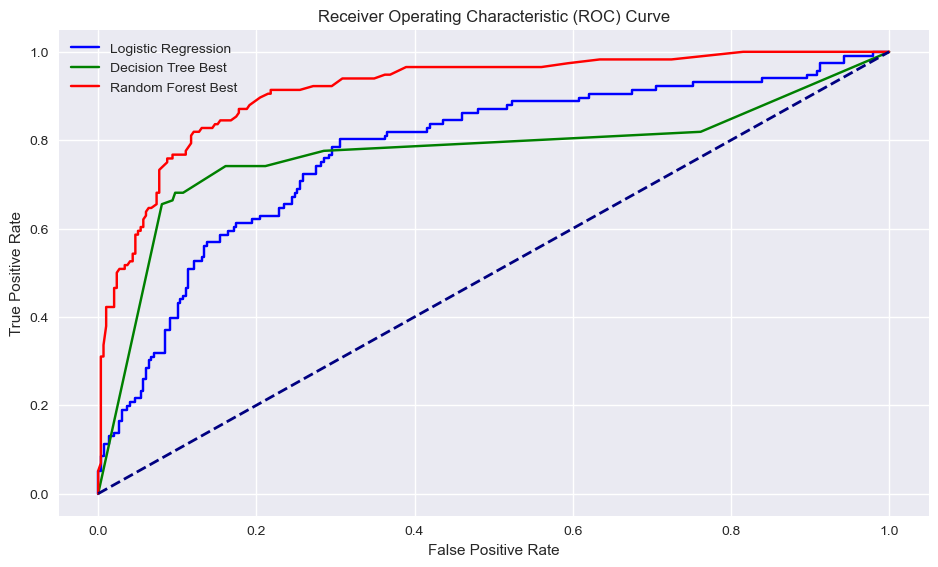

In [48]:
from sklearn.metrics import roc_curve, auc

fpr_logi_best, tpr_logi_best, _ = roc_curve(y_test, logreg_model.predict_proba(X_test)[:, 1])
fpr_dt_best, tpr_dt_best, _ = roc_curve(y_test, dt_best.predict_proba(X_test)[:, 1])
fpr_rf_best, tpr_rf_best, _ = roc_curve(y_test, rf_best.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(fpr_logi_best, tpr_logi_best, label='Logistic Regression', color='blue')
plt.plot(fpr_dt_best, tpr_dt_best, label='Decision Tree Best', color='green')
plt.plot(fpr_rf_best, tpr_rf_best, label='Random Forest Best', color='red')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### Our best classification model is our random forest model. It doesn't have the best sensitivity rate, but it performs the best in all other measured metrics and is very close in sensitivty to our single tree model. When looking at the important features, we again see that total price for out of state student living has heavy influence in this model and in fact it is the biggest determinate. As seen from the scatter plots, we notice that as out of state tuition goes up, so do the applications. We also see that SAT math scores, tuition and fees are very important. Math has a positive relationship with Applicant total (as seen at the bottom of this report). It could be interpreted as more applicants are stem focused. So a possible solution would be to heavily invest in stem programs and research.


## Step 6 Regression

### Lasso

In [49]:
# Assign the x and y variables
# Drop the columns that are too similar in X

y = df_Ca['Applicants total']
X = df_Ca.drop(['Applicants total', 'Categorical Applicants'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error

# Define the hyperparameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 15, 20, 30, 100, 200]}

# Create the Lasso regression model
lasso = Lasso()

# Perform grid search with cross-validation
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_alpha = grid_search.best_params_['alpha']

# Fit the Lasso model with the best alpha
lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred_test_lasso = lasso_model.predict(X_test)

# Calculate the performance metrics
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_test_lasso))
mape_lasso = mean_absolute_percentage_error(y_test, y_pred_test_lasso)
r2_lasso = r2_score(y_test, y_pred_test_lasso)

# Print the results
print("LASSO Regression Results:")
print(f"Optimal Alpha (Lambda): {best_alpha}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_lasso:.2f}%")
print(f"R-squared (R²): {r2_lasso:.4f}")




C:\Users\Katabatic\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.478e+09, tolerance: 5.826e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\Katabatic\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.387e+09, tolerance: 5.607e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\Katabatic\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.836e+

LASSO Regression Results:
Optimal Alpha (Lambda): 100
Root Mean Squared Error (RMSE): 5125.16
Mean Absolute Percentage Error (MAPE): 5.18%
R-squared (R²): 0.6493


The best alpha for our Lasso model is 100. Our MAPE is really good, but our R squared is only .64 which means we are only explaining 64% of the error in our data.

In [51]:
# Define the hyperparameter grid for Ridge regression
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 15, 20, 30, 100, 200]}

# Create the Ridge regression model
ridge = Ridge()

# Perform grid search with cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_alpha = grid_search.best_params_['alpha']

# Fit the Ridge model with the best alpha
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred_test_ridge = ridge_model.predict(X_test)

# Calculate the performance metrics
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_test_ridge))
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_test_ridge)
r2_ridge = r2_score(y_test, y_pred_test_ridge)

# Print the results
print("Ridge Regression Results:")
print(f"Optimal Alpha (Lambda): {best_alpha}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_ridge:.2f}%")
print(f"R-squared (R²): {r2_ridge:.4f}")


Ridge Regression Results:
Optimal Alpha (Lambda): 30
Root Mean Squared Error (RMSE): 5136.69
Mean Absolute Percentage Error (MAPE): 5.73%
R-squared (R²): 0.6478


Our ridge is slightly worse than our lasso. It is very close though. We do wish that the R squared was higher though. 

In [52]:
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Fit the Random Forest model with the best hyperparameters
best_rf_model = RandomForestRegressor(random_state=42, **best_params)
best_rf_model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred_test_rf = best_rf_model.predict(X_test)

# Calculate the performance metrics
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))
r2_rf = r2_score(y_test, y_pred_test_rf)

mape_rf = mean_absolute_percentage_error(y_test, y_pred_test_rf)

# Print the results
print("Random Forest Regression Results:")
print("Best Hyperparameters:", best_params)
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_rf:.2f}%")
print(f"R-squared (R²): {r2_rf:.4f}")

C:\Users\Katabatic\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Katabatic\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Katabatic\anaconda3\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Katabatic\anaconda3\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Katabatic\anac

Random Forest Regression Results:
Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Root Mean Squared Error (RMSE): 4976.53
Mean Absolute Percentage Error (MAPE): 2.83%
R-squared (R²): 0.6694


Feature Importances:
                                               Feature    Importance
3                       SAT Math 75th percentile score  7.442057e-02
156  Carnegie Classification 2010: Basic_Research U...  6.155632e-02
2                       SAT Math 25th percentile score  5.242791e-02
13   Total price for out-of-state students living o...  4.749010e-02
15   Graduation rate - Bachelor degree within 5 yea...  4.397046e-02
16   Graduation rate - Bachelor degree within 6 yea...  4.142982e-02
11                           Tuition and fees, 2013-14  4.097693e-02
8                            Tuition and fees, 2010-11  4.084529e-02
12   Total price for in-state students living on ca...  4.058673e-02
7                             Percent admitted - total  3.977401e-02
10                           Tuition and fees, 2012-13  3.842946e-02
0           SAT Critical Reading 25th percentile score  3.422816e-02
9                            Tuition and fees, 2011-12  3.380703e-02
4            

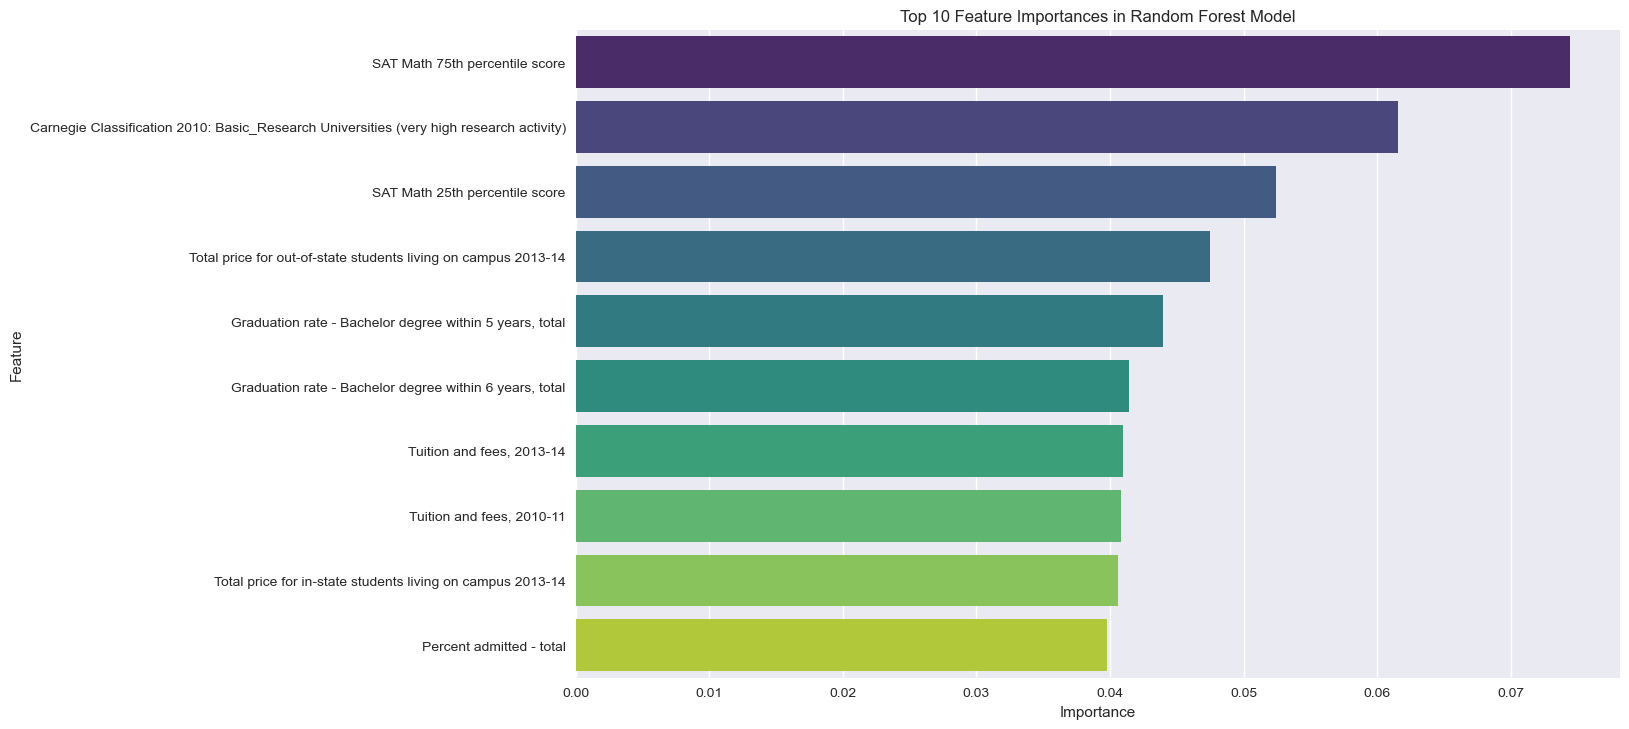

In [53]:
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print("Feature Importances:")
print(feature_importance_df)

# Plot the top N features
top_n = 10  # You can change this to visualize a different number of top features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n), palette='viridis')
plt.title(f'Top {top_n} Feature Importances in Random Forest Model')
plt.show()

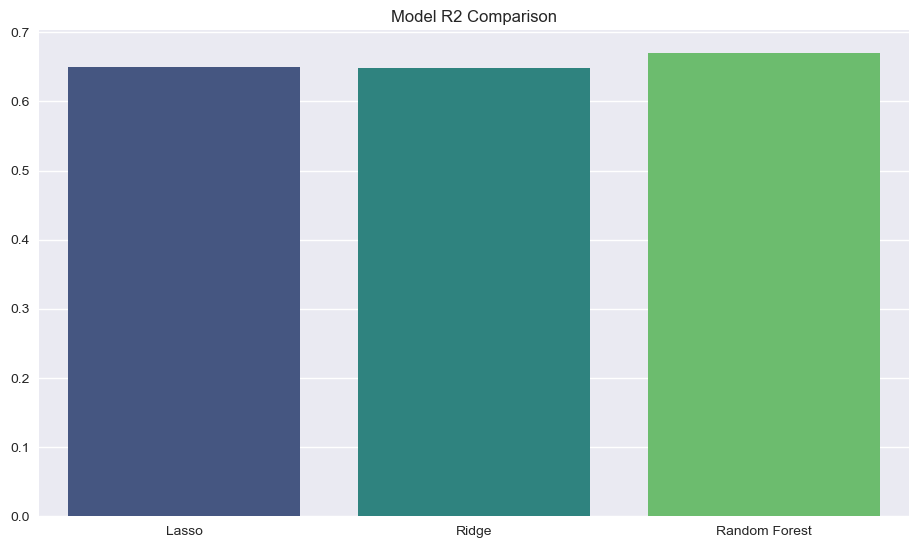

In [54]:
#plot the r squared score of the models
models = ['Lasso', 'Ridge', 'Random Forest']
r2 = [lasso_model.score(X_test, y_test), ridge_model.score(X_test, y_test), best_rf_model.score(X_test, y_test)]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=r2, palette='viridis')
plt.title('Model R2 Comparison')
plt.show()

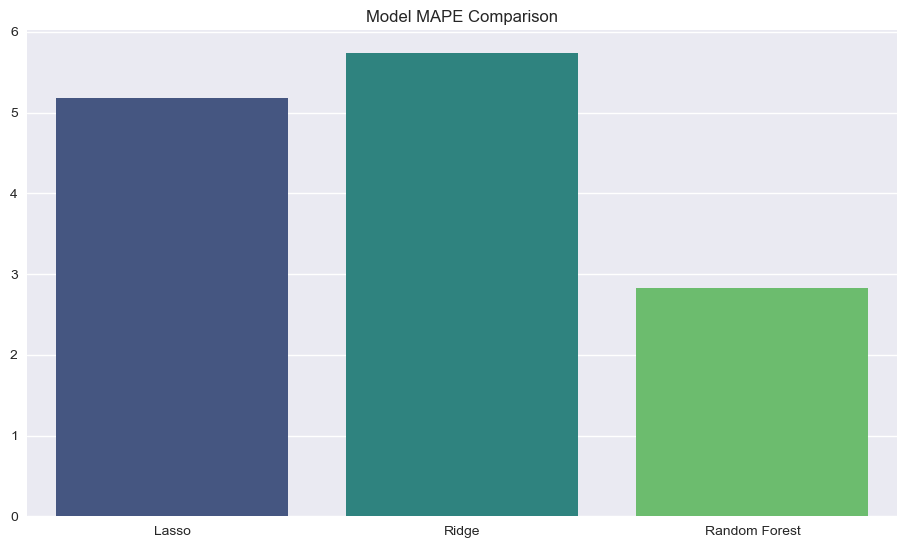

In [55]:
#plot the MAPE of the models
models = ['Lasso', 'Ridge', 'Random Forest']
mape = [mean_absolute_percentage_error(y_test, y_pred_test_lasso), mean_absolute_percentage_error(y_test, y_pred_test_ridge), mean_absolute_percentage_error(y_test, y_pred_test_rf)]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=mape, palette='viridis')
plt.title('Model MAPE Comparison')
plt.show()


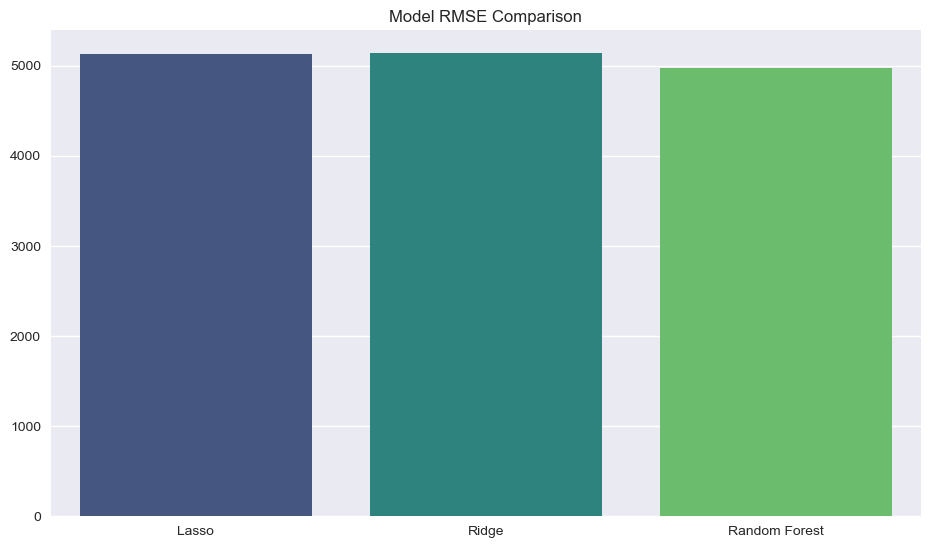

In [56]:
# plot the RMSE of the models
models = ['Lasso', 'Ridge', 'Random Forest']
rmse = [mean_squared_error(y_test, y_pred_test_lasso, squared=False), np.sqrt(mean_squared_error(y_test, y_pred_test_ridge)), np.sqrt(mean_squared_error(y_test, y_pred_test_rf))]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=rmse, palette='viridis')
plt.title('Model RMSE Comparison')
plt.show()

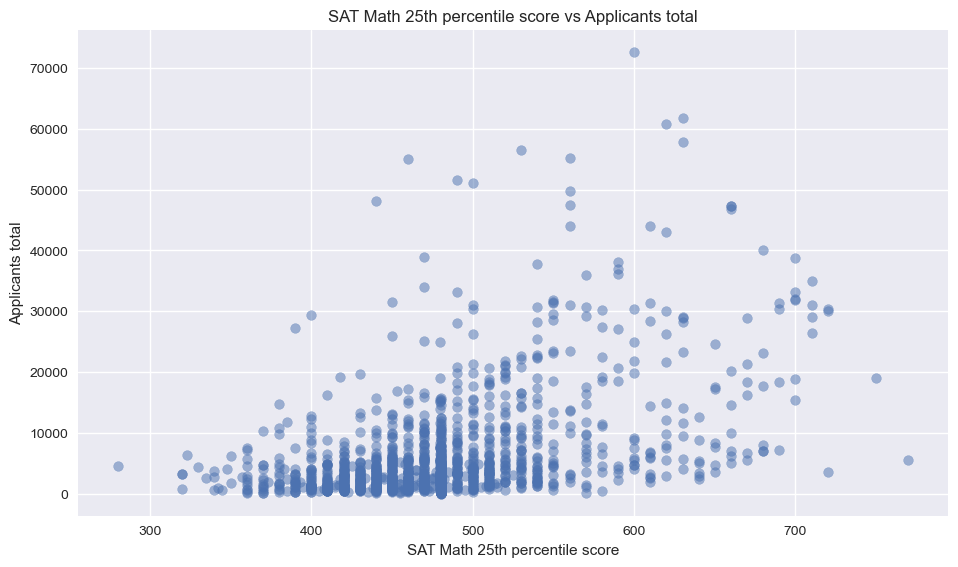

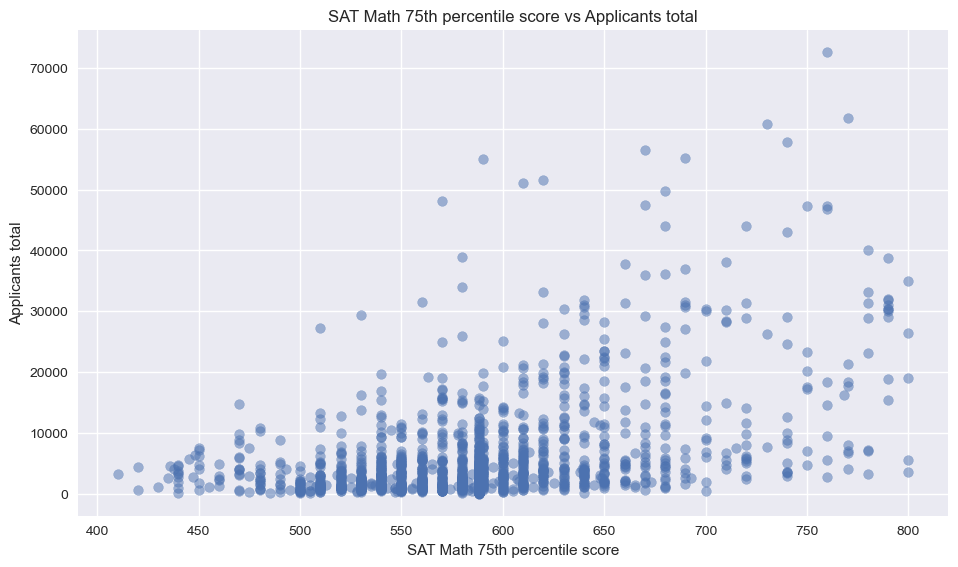

In [57]:
# Scatter plot for SAT Math 25th percentile score vs Applicants total
plt.figure(figsize=(10, 6))
plt.scatter(X['SAT Math 25th percentile score'], y, alpha=0.5)
plt.title('SAT Math 25th percentile score vs Applicants total')
plt.xlabel('SAT Math 25th percentile score')
plt.ylabel('Applicants total')
plt.show()

# Scatter plot for SAT Math 75th percentile score vs Applicants total
plt.figure(figsize=(10, 6))
plt.scatter(X['SAT Math 75th percentile score'], y, alpha=0.5)
plt.title('SAT Math 75th percentile score vs Applicants total')
plt.xlabel('SAT Math 75th percentile score')
plt.ylabel('Applicants total')
plt.show()

#### Looking at the measurment results for all of our regression models, we see that our random forest model is the best. It has the highest R squared, lowest MAPE, and lowest MAPE. When we look at the feature importance and remember the scatter plots we created earlier, we see that it is still very important for us to heavily invest in our research department to recieve more applicants. Next, we see that we want to attract applicants with higher SAT math scores which can be done by investing in our math department more and focusing more on math related degrees in our marketing. 